In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_artist=pd.read_csv('/content/drive/MyDrive/DM2/dataset/tabular/artists.csv')
df_artist.head()

,id,name,popularity,followers,genres
0,19slOlozrbxkEIMD8L3Qsv,Fast Eddie,28.0,9904.0,"['acid house', 'chicago house', 'chicago rap',..."
1,4BIamAD25vwYldaOWTEsXd,Joe Smooth,38.0,13047.0,"['chicago house', 'classic house']"
2,0B9P7RXrukgIdmutz9XMVN,"Farley ""Jackmaster"" Funk",21.0,11933.0,"['acid house', 'chicago house', 'classic house']"
3,09xC3MewWz48F1OpYckXTZ,Jomanda,20.0,4724.0,"['chicago house', 'garage house']"
4,0RBnTX5xoVa1bDYt9Qbies,Floorplan,37.0,42515.0,"['chicago house', 'deep house', 'float house',..."


In [ ]:
df_tracks = pd.read_csv('/content/drive/MyDrive/DM2/dataset/tabular/tracks.csv')
df_tracks.head()

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,...,290479,3,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,minimal-techno
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,...,539229,4,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,minimal-techno
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,...,264200,3,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,minimal-techno
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,387414,4,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,minimal-techno
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,248957,4,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,minimal-techno


In [ ]:
df_tracks.shape

(109547, 34)

In [ ]:
# Drop rows with any missing values in 'df_artist'
df_artist = df_artist.dropna()

df_artist.head()

,id,name,popularity,followers,genres
0,19slOlozrbxkEIMD8L3Qsv,Fast Eddie,28.0,9904.0,"['acid house', 'chicago house', 'chicago rap',..."
1,4BIamAD25vwYldaOWTEsXd,Joe Smooth,38.0,13047.0,"['chicago house', 'classic house']"
2,0B9P7RXrukgIdmutz9XMVN,"Farley ""Jackmaster"" Funk",21.0,11933.0,"['acid house', 'chicago house', 'classic house']"
3,09xC3MewWz48F1OpYckXTZ,Jomanda,20.0,4724.0,"['chicago house', 'garage house']"
4,0RBnTX5xoVa1bDYt9Qbies,Floorplan,37.0,42515.0,"['chicago house', 'deep house', 'float house',..."


In [ ]:
# prompt: check for duplicates rows in df_tracks

duplicate_rows_df = df_tracks[df_tracks.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)
duplicate_rows_df


Number of duplicate rows:  (398, 34)


,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
271,1rhSz40cKH9mzrlJKhg0E4,Sábado Rebelde,1,240266,False,1,8,Daddy Yankee;Plan B,compilation,FELIZ CUMPLEAÑOS,...,240267,4,232.79166,0.295,1.000,0.788,0.532,653.0,166.0,hip-hop
280,1dVZeuQFWzSI22d3hPEncI,BOMBÓN,1,182413,True,22,28,Daddy Yankee;El Alfa;Lil Jon,compilation,Feliz Cumpleaños con Perreo,...,182413,4,177.50494,0.874,1.000,0.734,0.637,373.0,93.0,hip-hop
296,2T1SNgLERipx3n6iVTeHZA,Shaky Shaky - Remix,1,234560,False,0,17,Daddy Yankee;Nicky Jam;Plan B;Rome & Urba,compilation,Halloween 2022 Perreo Vol. 1,...,234560,4,225.93016,0.197,1.000,0.514,0.430,679.0,169.0,hip-hop
693,5oibpY8nzNR2uCPKMzLeK0,Calling My Spirit,1,152000,False,1,7,Kodak Black,compilation,Walk in the Park Rap,...,152000,4,138.64053,0.801,1.000,0.235,0.465,301.0,76.0,hip-hop
919,5Re7Mp8Bh2ldBx61DSxU0M,About Damn Time,1,191822,True,0,15,Lizzo,compilation,Pop Brandneu,...,191822,4,186.04990,0.809,0.976,0.482,0.586,344.0,86.0,hip-hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98563,2IHTPzWvCxfYdLzdWofJYp,Nina,1,232653,False,24,8,Michael Wendler,compilation,The Very Best Of,...,232653,4,227.38141,1.000,0.731,0.619,0.530,487.0,121.0,party
98778,2JjmTbiaj8Zin3ePd6hfdB,Maschinen,1,156269,True,23,4,FiNCH,single,Kassenhäuschen EP,...,156270,4,152.84535,0.173,1.000,0.335,0.353,387.0,96.0,party
98823,44ZjtiuwW9fA4SHrvEggL2,Verdammt Ich lieb' dich,1,217680,False,22,3,Matthias Reim,single,Verdammt Ich hab Nix,...,217680,4,210.29152,0.497,0.920,0.300,0.361,393.0,97.0,party
99659,5A6E9cVlxYAmEvdbEE4w9Y,drivers license - Piano Arrangement,1,284000,False,34,5,Karim Kamar,single,"Selected Works, Vol. 3",...,284000,4,263.58713,0.099,0.770,0.600,0.757,575.0,145.0,piano


In [ ]:
# prompt: delete all duplicated rows. keep only one of them

# Drop duplicate rows, keeping the first occurrence
df_tracks = df_tracks.drop_duplicates(keep='first')

# Verify the number of duplicate rows after removal
duplicate_rows_df = df_tracks[df_tracks.duplicated()]
print("Number of duplicate rows after removal: ", duplicate_rows_df.shape)

Number of duplicate rows after removal:  (0, 34)


In [ ]:
df_tracks.shape

(109149, 34)

In [ ]:

# Convert duration from milliseconds to minutes
df_tracks['duration_min'] = df_tracks['duration_ms'] / 60000

In [ ]:
# Step 1: Explode the 'artists' column in df_tracks to handle multiple artists per track
# Split the artists column and explode it
df_tracks_exploded = df_tracks.assign(artists=df_tracks['artists'].str.split(';')).explode('artists')


# Step 2: Merge df_tracks with df_artist on artist_name and name columns
merged_df = pd.merge(
    df_tracks_exploded,  # Tracks dataset with exploded artists
    df_artist,           # Artists dataset
    how='left',          # Perform a left join
    left_on='artists',  # Column in df_tracks_exploded
    right_on='name'        # Column in df_artist
)

# Step 3: Inspect the first few rows of the merged dataset
merged_df.head(6)

,id_x,name_x,disc_number,duration_ms,explicit,popularity_x,track_number,artists,album_type,album_name,...,mode_confidence,n_beats,n_bars,genre,duration_min,id_y,name_y,popularity_y,followers,genres
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,...,0.525,705.0,234.0,minimal-techno,4.841317,2D9Oe8R9UhbMvFAsMJpXj0,Kölsch,51.0,218818.0,"['danish electronic', 'danish techno', 'deep e..."
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,...,0.589,1074.0,269.0,minimal-techno,8.987150,6X8lhZ7YaRUBlOsOYimlyD,Kiasmos,47.0,231613.0,"['electronica', 'icelandic electronic']"
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,...,0.760,516.0,171.0,minimal-techno,4.403333,3HRRzIZNQFus3xlUx2xKy1,Joris Delacroix,44.0,100828.0,"['deep euro house', 'minimal melodic techno', ..."
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot,single,Confronted Remixes,...,0.503,826.0,207.0,minimal-techno,6.456883,6OQOvP7RAdmAKVXXQqD0Se,Pan-Pot,36.0,209027.0,"['german techno', 'minimal techno', 'raw techno']"
4,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Anfisa Letyago,single,Confronted Remixes,...,0.503,826.0,207.0,minimal-techno,6.456883,7icoOm5fKKPo49jVxoj1Cq,Anfisa Letyago,40.0,87586.0,[]
5,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,0.459,493.0,123.0,minimal-techno,4.149267,1oXiuCd5F0DcnmXH5KaM6N,Kollektiv Turmstrasse,45.0,245839.0,"['german techno', 'hamburg electronic', 'minim..."


In [ ]:
# Merge the exploded dataframe with artist details
df_combined = pd.merge(df_tracks_exploded, df_artist[['name','popularity','followers']], left_on='artists', right_on='name', how='inner')

# Now the dataframe contains details about tracks and their corresponding artists
df_combined.head()


,id,name_x,disc_number,duration_ms,explicit,popularity_x,track_number,artists,album_type,album_name,...,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,duration_min,name_y,popularity_y,followers
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,...,1.000,0.500,0.525,705.0,234.0,minimal-techno,4.841317,Kölsch,51.0,218818.0
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,...,0.326,0.410,0.589,1074.0,269.0,minimal-techno,8.987150,Kiasmos,47.0,231613.0
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,...,0.457,0.904,0.760,516.0,171.0,minimal-techno,4.403333,Joris Delacroix,44.0,100828.0
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot,single,Confronted Remixes,...,0.498,0.512,0.503,826.0,207.0,minimal-techno,6.456883,Pan-Pot,36.0,209027.0
4,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Anfisa Letyago,single,Confronted Remixes,...,0.498,0.512,0.503,826.0,207.0,minimal-techno,6.456883,Anfisa Letyago,40.0,87586.0


In [ ]:
df_tracks["artists"].nunique()

31480

In [ ]:
df_tracks_exploded["artists"].nunique()

29921

In [ ]:
# Calculate weighted popularity and followers
df_combined['Artists_popularity'] = df_combined.groupby('id')['popularity_y'].transform(lambda x: np.average(x, weights=x) if x.sum() != 0 else 0)
df_combined['Artists_followers'] = df_combined.groupby('id')['followers'].transform(lambda x: np.average(x, weights=x) if x.sum() != 0 else 0)

# Get all columns from df_tracks except 'artists'
track_columns = df_tracks.columns.difference(['artists'])

# Rename 'name' and 'popularity' in track_columns to avoid conflicts
track_columns = [col if col not in ['name', 'popularity'] else col + '_x' for col in track_columns]

# Select relevant columns for final DataFrame, including 'id' explicitly
aggregation_dict = {
    **{col: 'first' for col in track_columns},  # Include all track columns
    'Artists_popularity': 'first',
    'Artists_followers': 'first',
}

# If 'id' is in track_columns, remove it to avoid duplication
if 'id' in aggregation_dict:
    del aggregation_dict['id']

df_final = df_combined.groupby('id', as_index=False).agg(aggregation_dict)

df_final.head()

,id,acousticness,album_name,album_release_date,album_release_date_precision,album_total_tracks,album_type,danceability,disc_number,duration_min,...,speechiness,start_of_fade_out,tempo,tempo_confidence,time_signature,time_signature_confidence,track_number,valence,Artists_popularity,Artists_followers
0,0000vdREvCVMxbQTkS888c,0.075700,Lolly,2022-09-23,day,1,single,0.910,1,2.678750,...,0.1990,154.11664,104.042,0.578,4,1.000,1,0.432,45.000000,1.682600e+04
1,000CC8EParg64OmTxVnZ0p,0.406000,Glee Love Songs,2021-02-11,day,100,album,0.269,1,5.382217,...,0.0366,313.21976,178.174,0.030,4,0.659,10,0.341,67.000000,1.517867e+06
2,000Iz0K615UepwSJ5z2RE5,0.001140,X,2014-05-30,day,11,album,0.686,1,8.589333,...,0.0462,474.23273,119.997,0.832,4,0.996,5,0.108,52.880000,1.098065e+06
3,000RDCYioLteXcutOjeweY,0.058300,Teeje Week,2018-02-12,day,1,single,0.679,1,3.170050,...,0.1900,183.53633,161.721,0.103,4,1.000,1,0.839,57.495575,2.791233e+06
4,000qpdoc97IMTBvF8gwcpy,0.000964,Zeit,2001-10-08,day,11,album,0.519,1,5.520667,...,0.0291,321.92145,129.971,0.622,4,1.000,9,0.234,62.000000,1.172268e+06


In [ ]:
df_tracks.head(5)

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,duration_min
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,...,3,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,minimal-techno,4.841317
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,...,4,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,minimal-techno,8.987150
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,...,3,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,minimal-techno,4.403333
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,4,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,minimal-techno,6.456883
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,4,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,minimal-techno,4.149267


In [ ]:
df_final.head(5)

,id,acousticness,album_name,album_release_date,album_release_date_precision,album_total_tracks,album_type,danceability,disc_number,duration_min,...,speechiness,start_of_fade_out,tempo,tempo_confidence,time_signature,time_signature_confidence,track_number,valence,Artists_popularity,Artists_followers
0,0000vdREvCVMxbQTkS888c,0.075700,Lolly,2022-09-23,day,1,single,0.910,1,2.678750,...,0.1990,154.11664,104.042,0.578,4,1.000,1,0.432,45.000000,1.682600e+04
1,000CC8EParg64OmTxVnZ0p,0.406000,Glee Love Songs,2021-02-11,day,100,album,0.269,1,5.382217,...,0.0366,313.21976,178.174,0.030,4,0.659,10,0.341,67.000000,1.517867e+06
2,000Iz0K615UepwSJ5z2RE5,0.001140,X,2014-05-30,day,11,album,0.686,1,8.589333,...,0.0462,474.23273,119.997,0.832,4,0.996,5,0.108,52.880000,1.098065e+06
3,000RDCYioLteXcutOjeweY,0.058300,Teeje Week,2018-02-12,day,1,single,0.679,1,3.170050,...,0.1900,183.53633,161.721,0.103,4,1.000,1,0.839,57.495575,2.791233e+06
4,000qpdoc97IMTBvF8gwcpy,0.000964,Zeit,2001-10-08,day,11,album,0.519,1,5.520667,...,0.0291,321.92145,129.971,0.622,4,1.000,9,0.234,62.000000,1.172268e+06


In [ ]:
# Rename the column
df_final.rename(columns={'popularity_x': 'track_popularity'}, inplace=True)

# Verify the change
print(df_final.columns)

Index(['id', 'acousticness', 'album_name', 'album_release_date',
       'album_release_date_precision', 'album_total_tracks', 'album_type',
       'danceability', 'disc_number', 'duration_min', 'duration_ms', 'energy',
       'explicit', 'features_duration_ms', 'genre', 'instrumentalness', 'key',
       'key_confidence', 'liveness', 'loudness', 'mode', 'mode_confidence',
       'n_bars', 'n_beats', 'name_x', 'track_popularity', 'speechiness',
       'start_of_fade_out', 'tempo', 'tempo_confidence', 'time_signature',
       'time_signature_confidence', 'track_number', 'valence',
       'Artists_popularity', 'Artists_followers'],
      dtype='object')


In [ ]:
# Define genre mapping dictionary
genre_mapping = {
    # Electronic/Dance
    'disco': 'Electronic/Dance', 'synth-pop': 'Electronic/Dance', 'house': 'Electronic/Dance',
    'electro': 'Electronic/Dance', 'dance': 'Electronic/Dance',

    # Pop
    'r-n-b': 'Pop', 'british': 'Pop',

    # Rock/Alternative
    'ska': 'Rock/Alternative', 'punk': 'Rock/Alternative', 'guitar': 'Rock/Alternative',

    # Hip-Hop/Rap
    'trip-hop': 'Hip-Hop/Rap',

    # Classical/Instrumental
    'synth-pop': 'Classical/Instrumental', 'disco': 'Classical/Instrumental',

    # Latin/World
    'sertanejo': 'Latin/World', 'samba': 'Latin/World', 'forro': 'Latin/World',

    # Chill/Relaxation
    'sad': 'Chill/Relaxation',

    # Other/Niche
    'party': 'Other/Niche', 'romance': 'Other/Niche', 'anime': 'Other/Niche',
    'detroit-techno': 'Other/Niche', 'hardstyle': 'Other/Niche'
}

# Apply the mapping to your DataFrame
df_final['broad_genre'] = df_final['genre'].map(genre_mapping)

In [ ]:
df_final["broad_genre"].unique()

array(['Other/Niche', 'Electronic/Dance', 'Hip-Hop/Rap',
       'Jazz/Blues/Soul', 'Rock/Alternative', 'Country/Folk/Traditional',
       'Children/Family', 'Asian Music', nan, 'Latin/World', 'Pop',
       'Chill/Relaxation', 'Classical/Instrumental', 'Reggae/Dub'],
      dtype=object)

In [ ]:
df_final.head(2)

,id,acousticness,album_name,album_release_date,album_release_date_precision,album_total_tracks,album_type,danceability,disc_number,duration_min,...,start_of_fade_out,tempo,tempo_confidence,time_signature,time_signature_confidence,track_number,valence,Artists_popularity,Artists_followers,broad_genre
0,0000vdREvCVMxbQTkS888c,0.0757,Lolly,2022-09-23,day,1,single,0.910,1,2.678750,...,154.11664,104.042,0.578,4,1.000,1,0.432,45.0,16826.0,Other/Niche
1,000CC8EParg64OmTxVnZ0p,0.4060,Glee Love Songs,2021-02-11,day,100,album,0.269,1,5.382217,...,313.21976,178.174,0.030,4,0.659,10,0.341,67.0,1517867.0,Electronic/Dance


In [ ]:

# Merge the 'Artists' column from df_tracks to df_final based on the 'id' column.
# Since 'artists' is a list in df_tracks, and you likely want to add the list to the df_final, use a left merge and handle the merging of lists accordingly.

df_final = pd.merge(df_final, df_tracks[['id', 'artists']], on='id', how='left')

# Display the first few rows of the merged DataFrame to verify.
df_final.head()

,id,acousticness,album_name,album_release_date,album_release_date_precision,album_total_tracks,album_type,danceability,disc_number,duration_min,...,tempo,tempo_confidence,time_signature,time_signature_confidence,track_number,valence,Artists_popularity,Artists_followers,broad_genre,artists
0,0000vdREvCVMxbQTkS888c,0.075700,Lolly,2022-09-23,day,1,single,0.910,1,2.678750,...,104.042,0.578,4,1.000,1,0.432,45.000000,1.682600e+04,Other/Niche,Rill
1,000CC8EParg64OmTxVnZ0p,0.406000,Glee Love Songs,2021-02-11,day,100,album,0.269,1,5.382217,...,178.174,0.030,4,0.659,10,0.341,67.000000,1.517867e+06,Electronic/Dance,Glee Cast
2,000Iz0K615UepwSJ5z2RE5,0.001140,X,2014-05-30,day,11,album,0.686,1,8.589333,...,119.997,0.832,4,0.996,5,0.108,52.880000,1.098065e+06,Electronic/Dance,Paul Kalkbrenner;Pig&Dan
3,000RDCYioLteXcutOjeweY,0.058300,Teeje Week,2018-02-12,day,1,single,0.679,1,3.170050,...,161.721,0.103,4,1.000,1,0.839,57.495575,2.791233e+06,Hip-Hop/Rap,Jordan Sandhu;Bunty Bains
4,000qpdoc97IMTBvF8gwcpy,0.000964,Zeit,2001-10-08,day,11,album,0.519,1,5.520667,...,129.971,0.622,4,1.000,9,0.234,62.000000,1.172268e+06,Electronic/Dance,Paul Kalkbrenner


In [ ]:
df_final.shape

(109147, 38)

In [ ]:
# Assuming your 'artists' column contains a string of artist names separated by semicolons (;)
df_final['is_collaboration'] = df_final['artists'].apply(lambda x: 1 if ';' in x else 0)

In [ ]:
# 1. Explode the 'artists' column to have one row per artist per track
df_exploded = df_final.assign(artists=df_final['artists'].str.split(';')).explode('artists')

# 2. Group by artist and count total tracks
artist_total_tracks = df_exploded.groupby('artists')['id'].count().reset_index()
artist_total_tracks.rename(columns={'id': 'artist_total_tracks'}, inplace=True)

# 3. Merge total tracks back into the exploded DataFrame
df_exploded = pd.merge(df_exploded, artist_total_tracks, on='artists', how='left')

# 4. Group by original track ID and sum artist total tracks
track_artist_total_tracks = df_exploded.groupby('id')['artist_total_tracks'].sum().reset_index()
track_artist_total_tracks.rename(columns={'artist_total_tracks': 'total_tracks_all_artists'}, inplace=True)

# 5. Merge the calculated feature back into the original DataFrame
df_final = pd.merge(df_final, track_artist_total_tracks, on='id', how='left')

In [ ]:
# prompt: check for duplicate rows df_final

# Check for duplicate rows in df_final
duplicate_rows_df_final = df_final[df_final.duplicated()]
print("Number of duplicate rows in df_final: ", duplicate_rows_df_final.shape)

# Display the duplicate rows (optional)
print(duplicate_rows_df_final)

# Remove duplicate rows in df_final, keeping the first occurrence
df_final = df_final.drop_duplicates(keep='first')

# Verify the number of duplicate rows after removal
duplicate_rows_df_final = df_final[df_final.duplicated()]
print("Number of duplicate rows in df_final after removal: ", duplicate_rows_df_final.shape)

Number of duplicate rows in df_final:  (19582, 40)
                            id  acousticness  \
7       001APMDOl3qtx1526T11n1       0.31600   
9       001YQlnDSduXd5LgBd66gT       0.01940   
15      003vvx7Niy0yvhvHt4a68B       0.00121   
16      003vvx7Niy0yvhvHt4a68B       0.00121   
19      004h8smbIoAkUNDJvVKwkG       0.13100   
...                        ...           ...   
109126  7zubR9uYAWjb5KPZTMm85e       0.12700   
109127  7zubR9uYAWjb5KPZTMm85e       0.12700   
109129  7zumacGldlmxpoP8bpaeLe       0.00739   
109138  7zwn1eykZtZ5LODrf7c0tS       0.18600   
109139  7zwn1eykZtZ5LODrf7c0tS       0.18600   

                                             album_name album_release_date  \
7                                               New RnB         2022-10-21   
9                              Soda Stereo (Remastered)         1984-02-06   
15                                             Hot Fuss               2004   
16                                             Hot Fuss     

In [ ]:
df_final.head(5)

,id,acousticness,album_name,album_release_date,album_release_date_precision,album_total_tracks,album_type,danceability,disc_number,duration_min,...,time_signature,time_signature_confidence,track_number,valence,Artists_popularity,Artists_followers,broad_genre,artists,is_collaboration,total_tracks_all_artists
0,0000vdREvCVMxbQTkS888c,0.075700,Lolly,2022-09-23,day,1,single,0.910,1,2.678750,...,4,1.000,1,0.432,45.000000,1.682600e+04,Other/Niche,Rill,0,1
1,000CC8EParg64OmTxVnZ0p,0.406000,Glee Love Songs,2021-02-11,day,100,album,0.269,1,5.382217,...,4,0.659,10,0.341,67.000000,1.517867e+06,Electronic/Dance,Glee Cast,0,170
2,000Iz0K615UepwSJ5z2RE5,0.001140,X,2014-05-30,day,11,album,0.686,1,8.589333,...,4,0.996,5,0.108,52.880000,1.098065e+06,Electronic/Dance,Paul Kalkbrenner;Pig&Dan,1,53
3,000RDCYioLteXcutOjeweY,0.058300,Teeje Week,2018-02-12,day,1,single,0.679,1,3.170050,...,4,1.000,1,0.839,57.495575,2.791233e+06,Hip-Hop/Rap,Jordan Sandhu;Bunty Bains,1,11
4,000qpdoc97IMTBvF8gwcpy,0.000964,Zeit,2001-10-08,day,11,album,0.519,1,5.520667,...,4,1.000,9,0.234,62.000000,1.172268e+06,Electronic/Dance,Paul Kalkbrenner,0,44


In [ ]:
# prompt: save df_final to CSV in same directory as tracks dataset

# Get the directory of the tracks dataset
import os
tracks_dir = os.path.dirname('/content/drive/MyDrive/DM2/dataset/tabular/tracks.csv')

# Construct the full path for the output CSV file
output_file_path = os.path.join(tracks_dir, 'final_dataset.csv')

# Save the df_final DataFrame to the CSV file
df_final.to_csv(output_file_path, index=False)

In [ ]:
df_final["album_type"].value_counts()

,count
album_type,
album,50851
single,23300
compilation,15414


In [ ]:
# prompt: If the dataset is already unbalanced leave it as it is, otherwise turns the
# dataset into an imbalanced version (e.g., 96% - 4%, for binary
# classification).  My target variable is genre

# Check class distribution
genre_counts = df_final['broad_genre'].value_counts(normalize=True) * 100

# If the dataset is already imbalanced (e.g., one class is less than 4%), leave it as it is.
if genre_counts.min() < 4:
    print("Dataset is already imbalanced.")
else:
    # Identify the majority and minority classes.
    majority_class = genre_counts.index[0]
    minority_classes = genre_counts[genre_counts < 4].index.tolist()

    # Undersample the majority class.
    majority_samples = df_final[df_final['broad_genre'] == majority_class].sample(frac=0.04)

    # Combine the undersampled majority class and minority classes.
    imbalanced_df = pd.concat([majority_samples, df_final[df_final['broad_genre'].isin(minority_classes)]])

    # Shuffle the dataset
    imbalanced_df = imbalanced_df.sample(frac=1).reset_index(drop=True)

    # Update df_final with the imbalanced version
    df_final = imbalanced_df

    # Verify the new class distribution
    print("New class distribution:")
    print(df_final['broad_genre'].value_counts(normalize=True) * 100)

Dataset is already imbalanced.


In [ ]:
df_final['is_collaboration'].value_counts(normalize=True) * 100

,proportion
is_collaboration,
0,74.69324
1,25.30676


# Outliers Detection

In [ ]:
from collections import Counter
from collections import defaultdict

In [ ]:
# prompt: make a separate dataframe of only continuous variables

# Assuming df_final is your DataFrame
continuous_cols = df_final.select_dtypes(include=['number']).columns
df_continuous = df_final[continuous_cols]
df_continuous.head()

,acousticness,album_total_tracks,danceability,disc_number,duration_min,duration_ms,energy,features_duration_ms,instrumentalness,key,...,tempo,tempo_confidence,time_signature,time_signature_confidence,track_number,valence,Artists_popularity,Artists_followers,is_collaboration,total_tracks_all_artists
0,0.075700,1,0.910,1,2.678750,160725,0.374,160726,0.00301,8,...,104.042,0.578,4,1.000,1,0.432,45.000000,1.682600e+04,0,1
1,0.406000,100,0.269,1,5.382217,322933,0.516,322933,0.00000,0,...,178.174,0.030,4,0.659,10,0.341,67.000000,1.517867e+06,0,170
2,0.001140,11,0.686,1,8.589333,515360,0.560,515360,0.18100,5,...,119.997,0.832,4,0.996,5,0.108,52.880000,1.098065e+06,1,53
3,0.058300,1,0.679,1,3.170050,190203,0.770,190203,0.00000,0,...,161.721,0.103,4,1.000,1,0.839,57.495575,2.791233e+06,1,11
4,0.000964,11,0.519,1,5.520667,331240,0.431,331240,0.72000,6,...,129.971,0.622,4,1.000,9,0.234,62.000000,1.172268e+06,0,44


In [ ]:
df_continuous.columns

Index(['acousticness', 'album_total_tracks', 'danceability', 'disc_number',
       'duration_min', 'duration_ms', 'energy', 'features_duration_ms',
       'instrumentalness', 'key', 'key_confidence', 'liveness', 'loudness',
       'mode', 'mode_confidence', 'n_bars', 'n_beats', 'track_popularity',
       'speechiness', 'start_of_fade_out', 'tempo', 'tempo_confidence',
       'time_signature', 'time_signature_confidence', 'track_number',
       'valence', 'Artists_popularity', 'Artists_followers',
       'is_collaboration', 'total_tracks_all_artists'],
      dtype='object')

In [ ]:
# prompt: from df_continuous remove  is_collaboration', 'total_tracks_all_artists album_total_tracks, duration ms,  time_signature, key, track_number, mode, features_duration_ms

# Drop specified columns from df_continuous
columns_to_drop = ['is_collaboration', 'total_tracks_all_artists', 'album_total_tracks', 'duration_ms', 'time_signature', 'key', 'track_number', 'mode', 'features_duration_ms']
df_continuous = df_continuous.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(df_continuous)

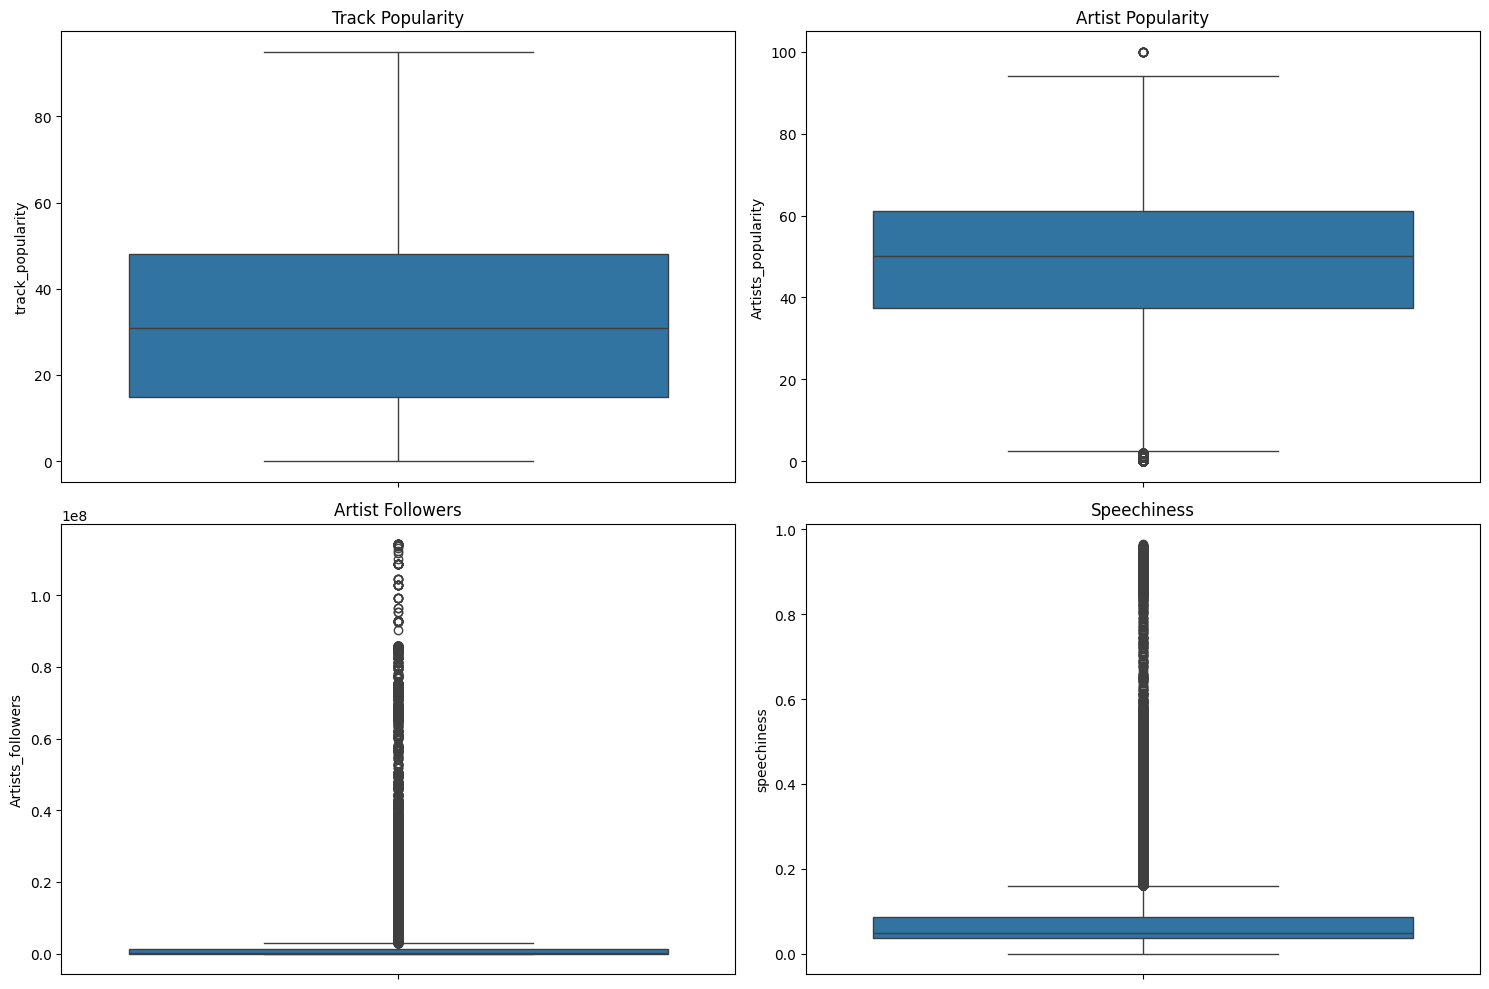

In [ ]:
# prompt: generate box plots of track , artist popularity and followers, speech as subplots

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot box plots for each feature
sns.boxplot(y=df_final['track_popularity'], ax=axes[0, 0])
axes[0, 0].set_title('Track Popularity')

sns.boxplot(y=df_final['Artists_popularity'], ax=axes[0, 1])
axes[0, 1].set_title('Artist Popularity')

sns.boxplot(y=df_final['Artists_followers'], ax=axes[1, 0])
axes[1, 0].set_title('Artist Followers')

sns.boxplot(y=df_final['speechiness'], ax=axes[1, 1])
axes[1, 1].set_title('Speechiness')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

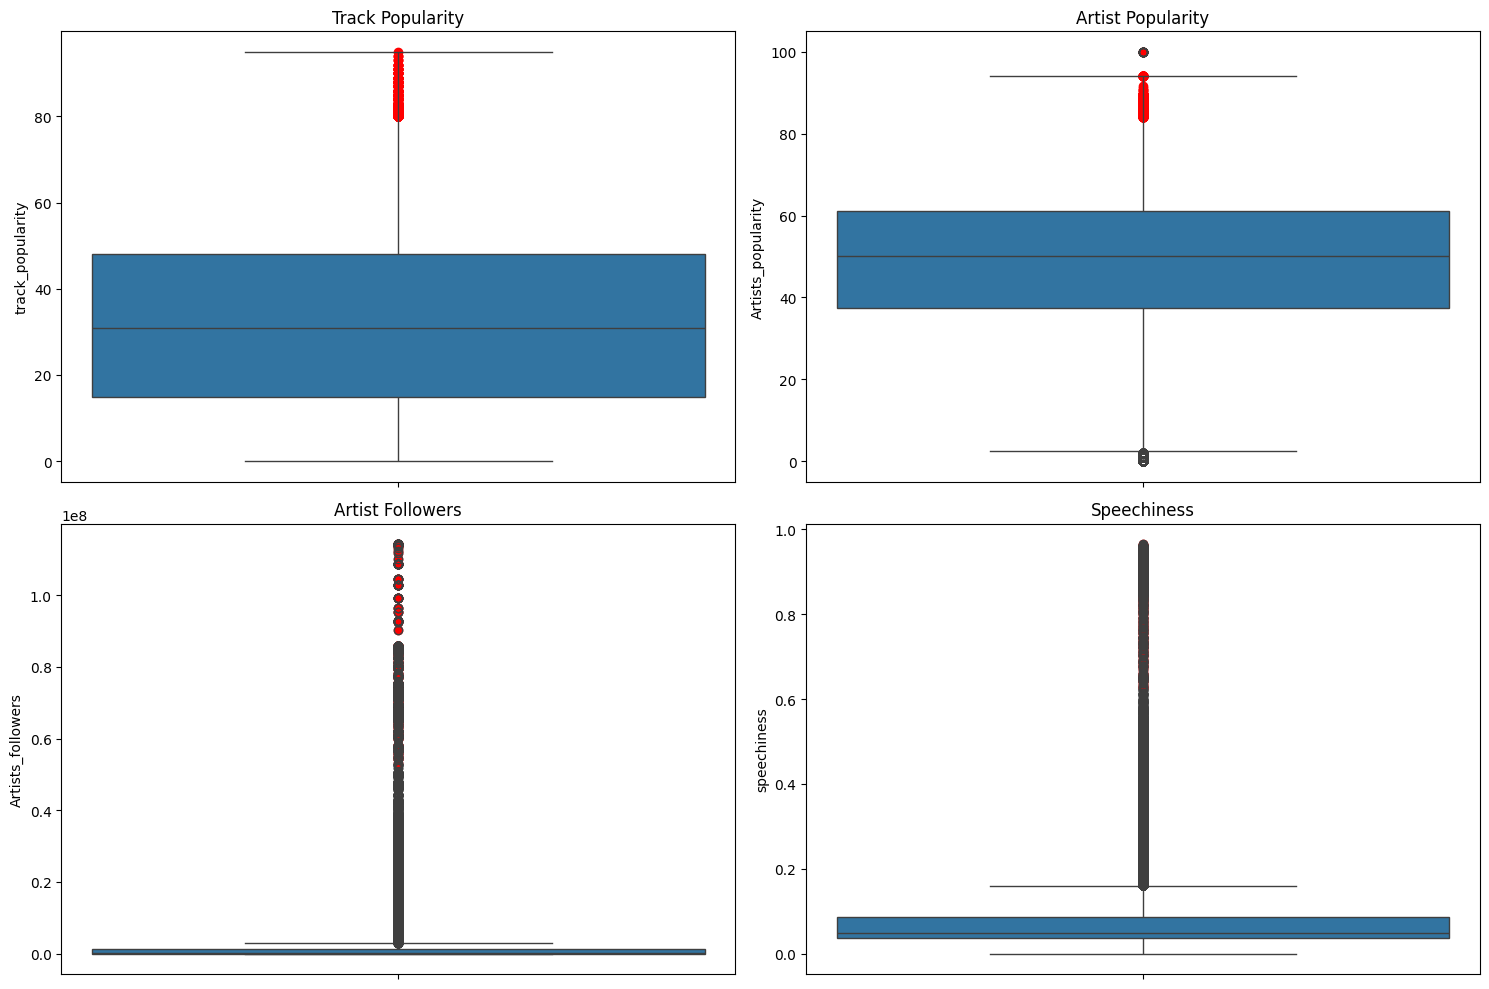

In [ ]:
# prompt: Identify top 1%  outliers (if there are any) in these above variables and highlight them in the box plot

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the 99th percentile for each column
percentile_99 = df_continuous.quantile(0.99)

# Identify outliers
outliers = df_continuous[df_continuous > percentile_99]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot box plots for each feature, highlighting outliers
sns.boxplot(y=df_final['track_popularity'], ax=axes[0, 0], showfliers=True)
axes[0,0].scatter(x=[0] * len(outliers['track_popularity']), y=outliers['track_popularity'], color='red', label='Outliers')
axes[0, 0].set_title('Track Popularity')

sns.boxplot(y=df_final['Artists_popularity'], ax=axes[0, 1], showfliers=True)
axes[0,1].scatter(x=[0] * len(outliers['Artists_popularity']), y=outliers['Artists_popularity'], color='red', label='Outliers')
axes[0, 1].set_title('Artist Popularity')

sns.boxplot(y=df_final['Artists_followers'], ax=axes[1, 0], showfliers=True)
axes[1,0].scatter(x=[0] * len(outliers['Artists_followers']), y=outliers['Artists_followers'], color='red', label='Outliers')
axes[1, 0].set_title('Artist Followers')

sns.boxplot(y=df_final['speechiness'], ax=axes[1, 1], showfliers=True)
axes[1,1].scatter(x=[0] * len(outliers['speechiness']), y=outliers['speechiness'], color='red', label='Outliers')
axes[1, 1].set_title('Speechiness')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.3-py3-none-any.whl size=200466 sha256=c5bc9849d8e812c45aa93233b70bb2d0fe7387e42ea9f1833c000195185daa6f
  Stored in directory: /root/.cache/pip/wheels/60/83/d0/cc2d3c992154f659eb68a8710537da31f50db28ff65a252189
Successfully built pyod


In [ ]:
from pyod.models.hbos import HBOS

In [ ]:
clf = HBOS(contamination=0.01)
clf.fit(X)

HBOS(alpha=0.1, contamination=0.01, n_bins=10, tol=0.5)

In [ ]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88669,   896]))

In [ ]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88669,   896]))

In [ ]:
outliers.shape

(89565,)

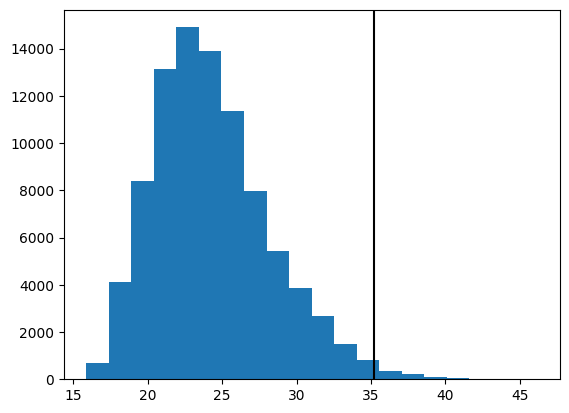

In [ ]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

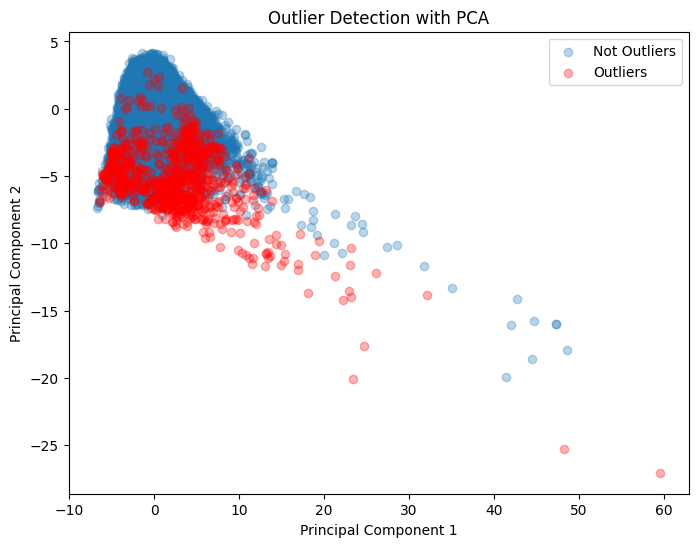

In [ ]:
# prompt: Plot the outliers and not outliers in a scatter plot using PCA

from sklearn.decomposition import PCA

# Assuming X is your standardized data and outliers is the array of outlier predictions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Create the scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(X_pca[outliers == 0, 0], X_pca[outliers == 0, 1], label='Not Outliers', alpha=0.3)
plt.scatter(X_pca[outliers == 1, 0], X_pca[outliers == 1, 1], label='Outliers', color='red', alpha=0.3)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Outlier Detection with PCA')
plt.legend()
plt.show()

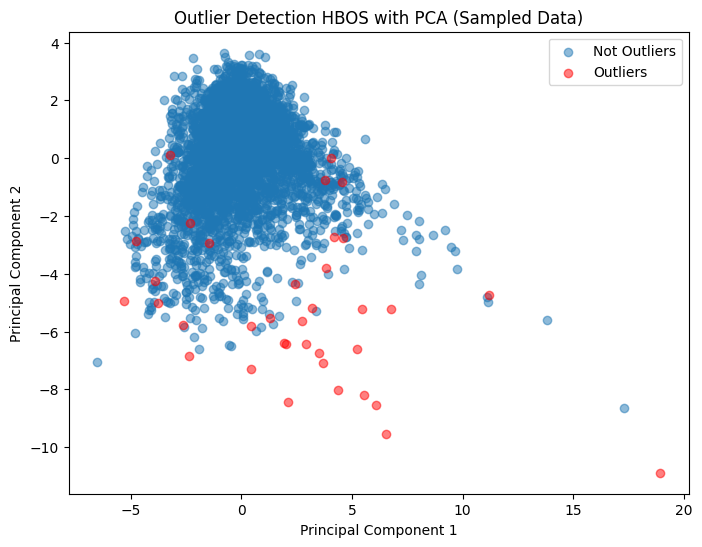

In [ ]:
# Sample the data for better visualization
sample_size = 4000  # Adjust as needed
sampled_indices = np.random.choice(X_pca.shape[0], size=sample_size, replace=False)
X_pca_sampled = X_pca[sampled_indices]
outliers_sampled = outliers[sampled_indices]

# Create the scatter plot with the sample
plt.figure(figsize=(8, 6))

plt.scatter(X_pca_sampled[outliers_sampled == 0, 0], X_pca_sampled[outliers_sampled == 0, 1], label='Not Outliers', alpha=0.5)
plt.scatter(X_pca_sampled[outliers_sampled == 1, 0], X_pca_sampled[outliers_sampled == 1, 1], label='Outliers', color='red', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Outlier Detection HBOS with PCA (Sampled Data)')
plt.legend()
plt.show()

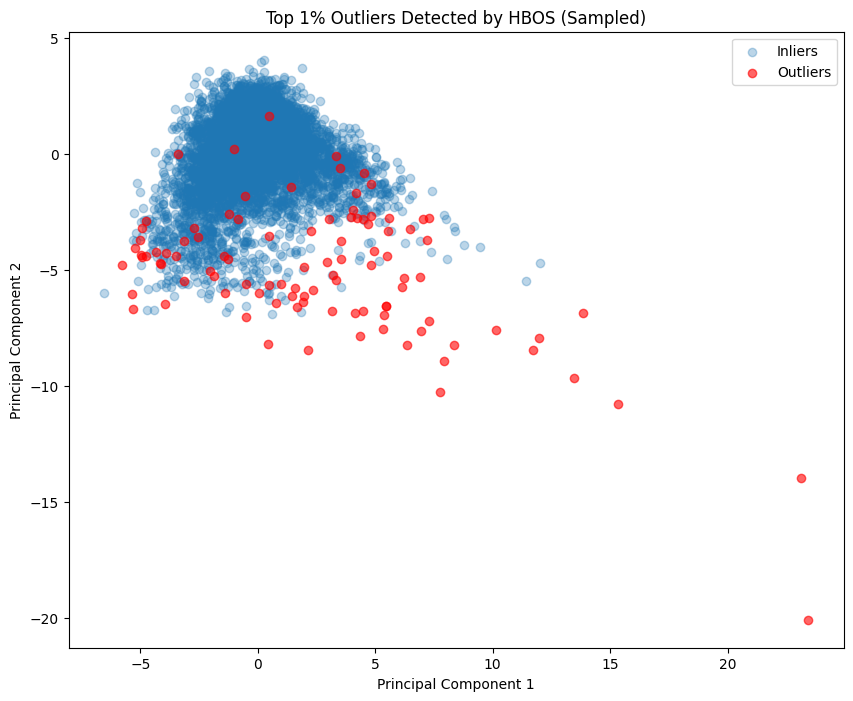

In [ ]:
# Sample a subset of outliers for plotting:
num_outliers_to_plot = 100  # Adjust as needed
outlier_indices = np.where(outliers == 1)[0]  # Get indices of all outliers
selected_outlier_indices = np.random.choice(outlier_indices, size=min(num_outliers_to_plot, len(outlier_indices)), replace=False)

# Sample a subset of inliers for plotting:
num_inliers_to_plot = 6000  # Adjust as needed
inlier_indices = np.where(outliers == 0)[0]  # Get indices of all inliers
selected_inlier_indices = np.random.choice(inlier_indices, size=min(num_inliers_to_plot, len(inlier_indices)), replace=False)

# Combine selected indices:
selected_indices = np.concatenate([selected_outlier_indices, selected_inlier_indices])

# --- Modification ends here ---

# Create the scatter plot:
plt.figure(figsize=(10, 8))

# Plot sampled inliers and outliers
plt.scatter(X_pca[selected_inlier_indices, 0], X_pca[selected_inlier_indices, 1], label='Inliers', alpha=0.3)
plt.scatter(X_pca[selected_outlier_indices, 0], X_pca[selected_outlier_indices, 1], color='red', alpha=0.6, label='Outliers')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Top 1% Outliers Detected by HBOS (Sampled)')
plt.legend()
plt.show()

In [ ]:
# prompt: get the number of outliers detected by the above HBOS model and total number of inliners. and total datapoints of HBOS modles

# Assuming 'outliers' is the array of outlier predictions from the HBOS model
n_outliers = np.sum(outliers == 1)
n_inliers = np.sum(outliers == 0)
total_datapoints = len(outliers)

print(f"Number of outliers detected: {n_outliers}")
print(f"Number of inliers: {n_inliers}")
print(f"Total number of datapoints: {total_datapoints}")

Number of outliers detected: 896
Number of inliers: 88669
Total number of datapoints: 89565


In [ ]:
np.shape(X_pca[outliers == 1, 0])

(896,)

In [ ]:
X.shape

(89565, 21)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


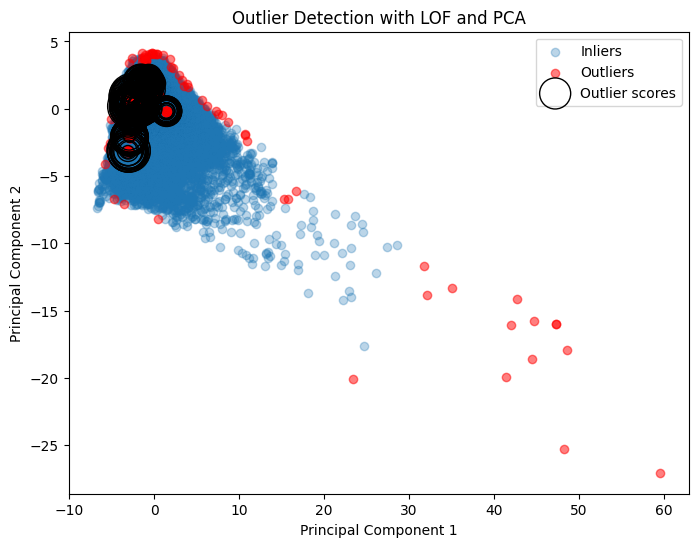

In [ ]:

# Can you generate something like this? with the outliers that is generated using above model and data of ours

import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# # Assuming X is your standardized data and outliers is the array of outlier predictions
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Use LocalOutlierFactor for outlier detection
clf = LocalOutlierFactor(n_neighbors=20, contamination='auto') # You can adjust n_neighbors and contamination
y_pred = clf.fit_predict(X_pca)

# Get outlier scores
X_scores = clf.negative_outlier_factor_

# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot inliers and outliers
plt.scatter(X_pca[y_pred == 1, 0], X_pca[y_pred == 1, 1], label='Inliers', alpha=0.3)
plt.scatter(X_pca[y_pred == -1, 0], X_pca[y_pred == -1, 1], label='Outliers', color='red', alpha=0.5)


# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1000 * radius, edgecolors='black',
            facecolors='none', label='Outlier scores')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Outlier Detection with LOF and PCA')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


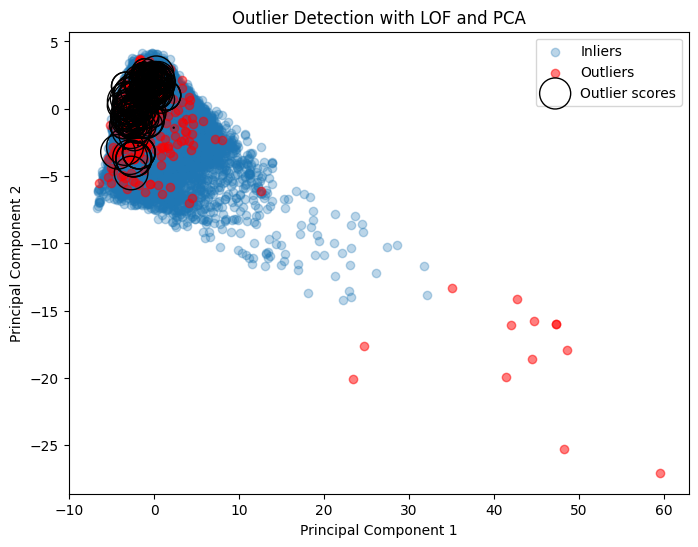

In [ ]:
# prompt: change the above code. The outliers should be detected before and then PCA should be performed to plot data LOF model. The LOF Model should first detect outliers on X and then perform PCA on X to plot those outliers

# Assuming X is your standardized data
clf = LocalOutlierFactor(n_neighbors=20, contamination='auto')
y_pred = clf.fit_predict(X)

# Get outlier scores
X_scores = clf.negative_outlier_factor_

# Apply PCA after outlier detection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot inliers and outliers
plt.scatter(X_pca[y_pred == 1, 0], X_pca[y_pred == 1, 1], label='Inliers', alpha=0.3)
plt.scatter(X_pca[y_pred == -1, 0], X_pca[y_pred == -1, 1], label='Outliers', color='red', alpha=0.5)

# Plot circles with radius proportional to outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1000 * radius, edgecolors='black',
            facecolors='none', label='Outlier scores')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Outlier Detection with LOF and PCA')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


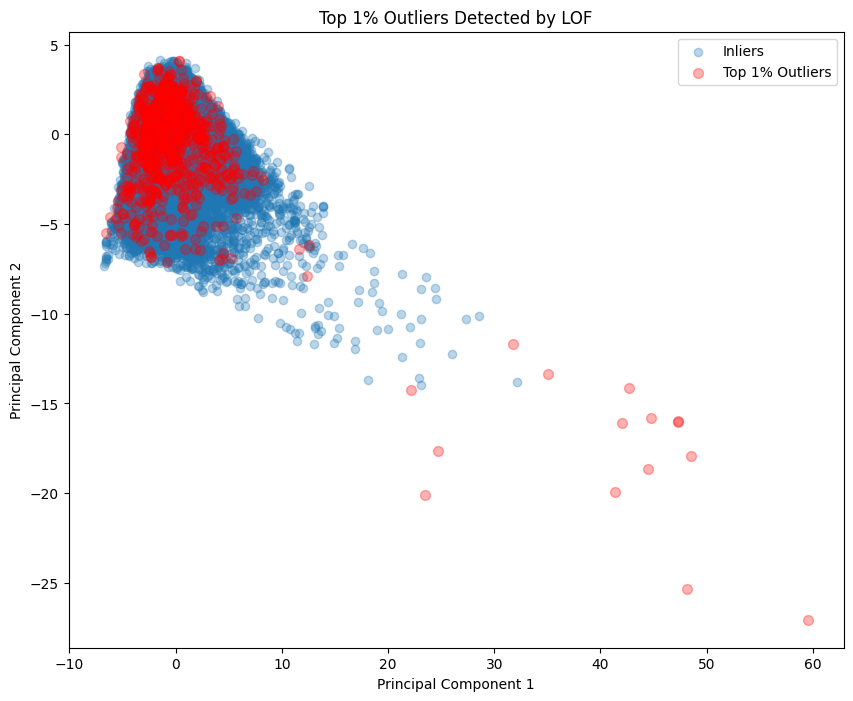

In [ ]:
# prompt: get the top 1% outliers detected by the LOF model and plot them

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

# Assuming X is your standardized data
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01) # Adjust contamination for top 1%
y_pred = clf.fit_predict(X)

# Get outlier scores
X_scores = clf.negative_outlier_factor_

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Identify top 1% outliers based on LOF scores
outlier_indices = np.argsort(X_scores)[:int(0.01 * len(X_scores))]

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Plot inliers
plt.scatter(X_pca[y_pred == 1, 0], X_pca[y_pred == 1, 1], label='Inliers', alpha=0.3)

# Plot outliers
plt.scatter(X_pca[outlier_indices, 0], X_pca[outlier_indices, 1], label='Top 1% Outliers', color='red', alpha=0.3, s=50) # Increased size for visibility

# Plot circles with radius proportional to outlier scores (optional)
# radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
# plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1000 * radius, edgecolors='black', facecolors='none', label='Outlier Scores')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Top 1% Outliers Detected by LOF')
plt.legend()
plt.show()

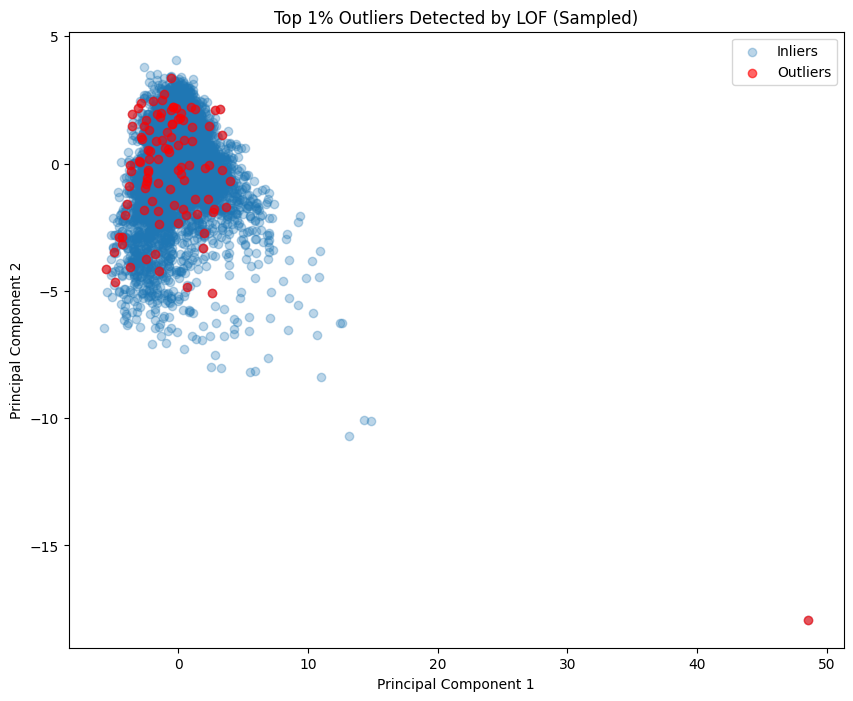

In [ ]:
# Sample a subset of outliers for plotting:
num_outliers_to_plot = 100  # Adjust as needed
outlier_indices = np.argsort(X_scores)[:int(0.01 * len(X_scores))]
selected_outlier_indices = np.random.choice(outlier_indices, size=min(num_outliers_to_plot, len(outlier_indices)), replace=False)

# Sample a subset of inliers for plotting:
num_inliers_to_plot = 6000  # Adjust as needed
inlier_indices = np.where(y_pred == 1)[0]
selected_inlier_indices = np.random.choice(inlier_indices, size=min(num_inliers_to_plot, len(inlier_indices)), replace=False)

# Combine selected indices:
selected_indices = np.concatenate([selected_outlier_indices, selected_inlier_indices])

# --- Modification ends here ---


# Create the scatter plot:
plt.figure(figsize=(10, 8))


# Plot circles with radius proportional to outlier scores

plt.scatter(X_pca[selected_indices, 0], X_pca[selected_indices, 1], label='Inliers', alpha=0.3)

plt.scatter(X_pca[selected_outlier_indices, 0], X_pca[selected_outlier_indices, 1], alpha=0.6,color='red', label='Outliers')



# --- Modification ends here ---




plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Top 1% Outliers Detected by LOF (Sampled)')
plt.legend()
plt.show()

In [ ]:
# prompt: get the number of outliers detected by the above LOF model and total number of inliners. and total datapoints of LOF modles

# Count outliers and inliers
n_outliers = np.sum(y_pred == -1)
n_inliers = np.sum(y_pred == 1)
total_datapoints = len(y_pred)

print(f"Number of outliers detected by LOF: {n_outliers}")
print(f"Number of inliers: {n_inliers}")
print(f"Total number of datapoints: {total_datapoints}")

Number of outliers detected by LOF: 896
Number of inliers: 88669
Total number of datapoints: 89565


### ISOLATION Tree

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
clf = IsolationForest(random_state=0,contamination=0.01)
clf.fit(X)

IsolationForest(contamination=0.01, random_state=0)

In [ ]:
outliers = clf.predict(X)

In [ ]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  896, 88669]))

In [ ]:
# prompt: get the total number of outliers detected by ISOLATION Forrest

# Assuming X_test and outliers are defined from the previous code
# ... (your existing code for data loading and outlier detection) ...

# Assuming 'outliers' is the array of outlier predictions from the Isolation Forest model
n_outliers = np.sum(outliers == -1)  # Isolation Forest labels outliers as -1
n_inliers = np.sum(outliers == 1)
total_datapoints = len(outliers)

print(f"Number of outliers detected by Isolation Forest: {n_outliers}")
print(f"Number of inliers: {n_inliers}")
print(f"Total number of datapoints: {total_datapoints}")

Number of outliers detected by Isolation Forest: 896
Number of inliers: 88669
Total number of datapoints: 89565


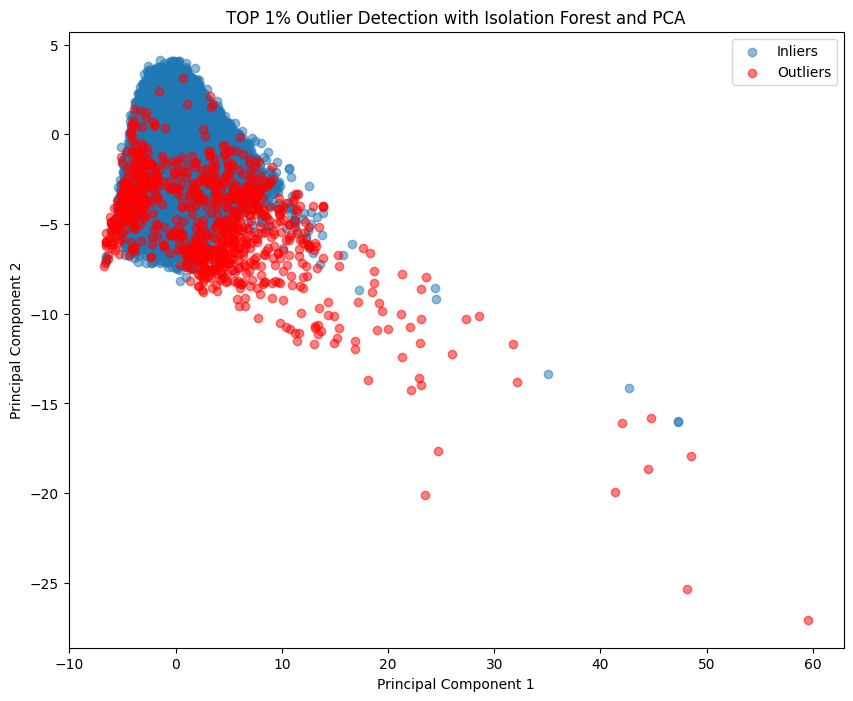

In [ ]:
# prompt: analyze the results of Isolation forrest and plot the outliers

# Assuming X_test and outliers are defined from the previous code
# ... (your existing code for data loading and outlier detection) ...

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca_test = pca.fit_transform(X)

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Plot inliers and outliers
plt.scatter(X_pca_test[outliers == 1, 0], X_pca_test[outliers == 1, 1], label='Inliers', alpha=0.5)
plt.scatter(X_pca_test[outliers == -1, 0], X_pca_test[outliers == -1, 1], label='Outliers', color='red', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('TOP 1% Outlier Detection with Isolation Forest and PCA')
plt.legend()
plt.show()

# ABOD

In [ ]:
from pyod.models.abod import ABOD

In [ ]:
# clf = ABOD(contamination=0.01,n_neighbors=30)
# clf.fit(X)

In [ ]:
# outliers = clf.predict(X)
# np.unique(outliers, return_counts=True)

In [ ]:
# np.unique(outliers)

In [ ]:
# X_pca_test

In [ ]:
# # prompt: Plot a graph of above results of PCA results of X

# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# # Assuming X and outliers are defined from the previous code
# # ... (your existing code for data loading and outlier detection) ...

# # Apply PCA for visualization
# pca = PCA(n_components=2)
# X_pca_test = pca.fit_transform(X)

# # Create the scatter plot
# plt.figure(figsize=(10, 8))

# # Plot inliers and outliers
# plt.scatter(X_pca_test[outliers == 0, 0], X_pca_test[outliers == 0, 1], label='Inliers', alpha=0.5)
# plt.scatter(X_pca_test[outliers == 1, 0], X_pca_test[outliers == 1, 1], label='Outliers', color='red', alpha=0.5)

# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('Outlier Detection with ABOD(neighbors=30) PCA')
# plt.legend()
# plt.show()

In [ ]:
#  # prompt: analyze the results of Isolation forrest and plot the outliers

# # Assuming X_test and outliers are defined from the previous code
# # ... (your existing code for data loading and outlier detection) ...

# # Apply PCA for visualization
# pca = PCA(n_components=2)
# X_pca_test = pca.fit_transform(X)

# # Create the scatter plot
# plt.figure(figsize=(10, 8))

# # Plot inliers and outliers
# plt.scatter(X_pca_test[outliers == 1, 0], X_pca_test[outliers == 1, 1], label='Inliers', alpha=0.5)
# plt.scatter(X_pca_test[outliers == -1, 0], X_pca_test[outliers == -1, 1], label='Outliers', color='red', alpha=0.5)

# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('TOP 1% Outlier Detection with Isolation Forest and PCA')
# plt.legend()
# plt.show()

In [ ]:
# # prompt: get the total number of outliers detected by ISOLATION Forrest

# # Assuming X_test and outliers are defined from the previous code
# # ... (your existing code for data loading and outlier detection) ...

# # Assuming 'outliers' is the array of outlier predictions from the Isolation Forest model
# n_outliers = np.sum(outliers == -1)  # Isolation Forest labels outliers as -1
# n_inliers = np.sum(outliers == 1)
# total_datapoints = len(outliers)

# print(f"Number of outliers detected by ABOD: {n_outliers}")
# print(f"Number of inliers: {n_inliers}")
# print(f"Total number of datapoints: {total_datapoints}")

In [ ]:
from pyod.models.loda import LODA

In [ ]:
clf = LODA(contamination=0.01)
clf.fit(X)

LODA(contamination=0.01, n_bins=10, n_random_cuts=100)

In [ ]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88669,   896]))

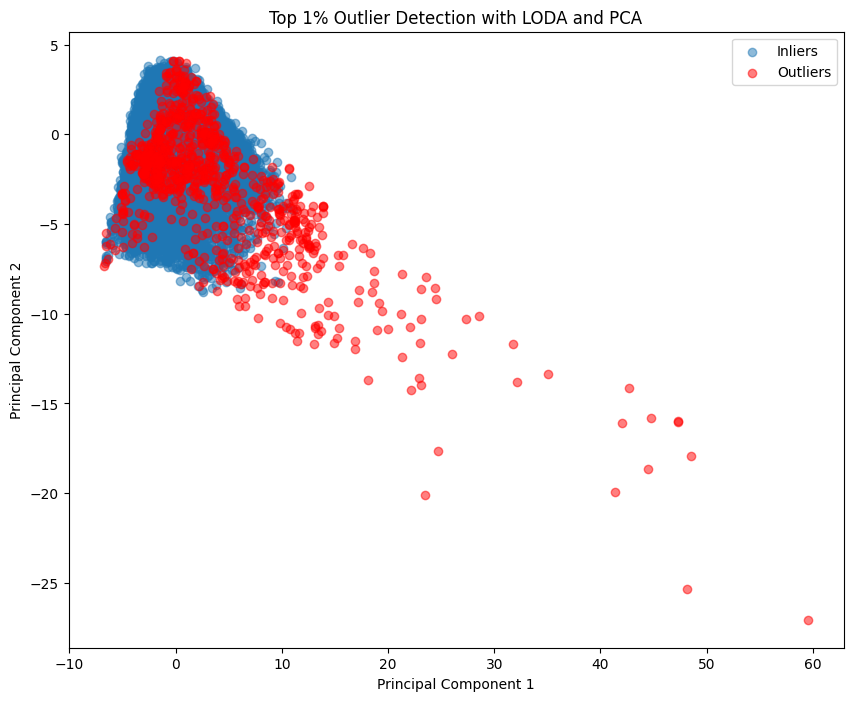

In [ ]:
# prompt: Plot the results of LODA using PCA

# Assuming X and outliers are defined from the previous code
# ... (your existing code for data loading and outlier detection) ...

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca_test = pca.fit_transform(X)

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Plot inliers and outliers
plt.scatter(X_pca_test[outliers == 0, 0], X_pca_test[outliers == 0, 1], label='Inliers', alpha=0.5)
plt.scatter(X_pca_test[outliers == 1, 0], X_pca_test[outliers == 1, 1], label='Outliers', color='red', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Top 1% Outlier Detection with LODA and PCA')
plt.legend()
plt.show()

In [ ]:
df_continuous.columns

Index(['acousticness', 'danceability', 'disc_number', 'duration_min', 'energy',
       'instrumentalness', 'key_confidence', 'liveness', 'loudness',
       'mode_confidence', 'n_bars', 'n_beats', 'track_popularity',
       'speechiness', 'start_of_fade_out', 'tempo', 'tempo_confidence',
       'time_signature_confidence', 'valence', 'Artists_popularity',
       'Artists_followers'],
      dtype='object')

In [ ]:
clf = HBOS(contamination=0.01)  # Adjust contamination as needed
clf.fit(X)  # X is your standardized data

# Identify outliers
outliers = clf.predict(X)

In [ ]:
# Remove outliers (Option 1)
df_final_no_outliers = df_final[outliers == 0]  # Assuming df_final is your original DataFrame

In [ ]:
df_final.shape

(89565, 40)

In [ ]:
df_final_no_outliers.shape

(88669, 40)

In [ ]:
df_final.columns

Index(['id', 'acousticness', 'album_name', 'album_release_date',
       'album_release_date_precision', 'album_total_tracks', 'album_type',
       'danceability', 'disc_number', 'duration_min', 'duration_ms', 'energy',
       'explicit', 'features_duration_ms', 'genre', 'instrumentalness', 'key',
       'key_confidence', 'liveness', 'loudness', 'mode', 'mode_confidence',
       'n_bars', 'n_beats', 'name_x', 'track_popularity', 'speechiness',
       'start_of_fade_out', 'tempo', 'tempo_confidence', 'time_signature',
       'time_signature_confidence', 'track_number', 'valence',
       'Artists_popularity', 'Artists_followers', 'broad_genre', 'artists',
       'is_collaboration', 'total_tracks_all_artists'],
      dtype='object')

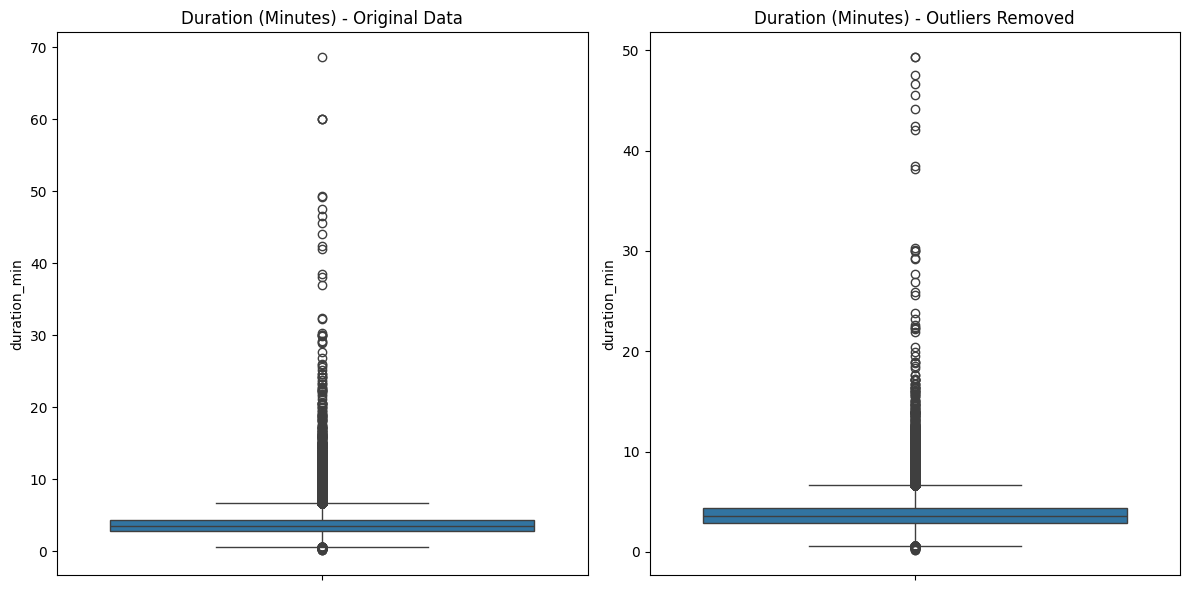

In [ ]:
# prompt: Generate Box plot for duration_min variable side by side of df_final and df_final_no_outliers

import matplotlib.pyplot as plt

# Create the box plots side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_final['duration_min'])
plt.title('Duration (Minutes) - Original Data')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_final_no_outliers['duration_min'])
plt.title('Duration (Minutes) - Outliers Removed')

plt.tight_layout()
plt.show()

# Imbalance Learning

In [ ]:
df_final_no_outliers.columns

Index(['id', 'acousticness', 'album_name', 'album_release_date',
       'album_release_date_precision', 'album_total_tracks', 'album_type',
       'danceability', 'disc_number', 'duration_min', 'duration_ms', 'energy',
       'explicit', 'features_duration_ms', 'genre', 'instrumentalness', 'key',
       'key_confidence', 'liveness', 'loudness', 'mode', 'mode_confidence',
       'n_bars', 'n_beats', 'name_x', 'track_popularity', 'speechiness',
       'start_of_fade_out', 'tempo', 'tempo_confidence', 'time_signature',
       'time_signature_confidence', 'track_number', 'valence',
       'Artists_popularity', 'Artists_followers', 'broad_genre', 'artists',
       'is_collaboration', 'total_tracks_all_artists'],
      dtype='object')

In [ ]:

# Step 1: Create binary classification target
threshold = 70  # Define popularity threshold
df_final_no_outliers['is_popular'] = np.where(df_final_no_outliers['track_popularity'] > threshold, 1, 0)


<ipython-input-93-1e8a77e41e56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_no_outliers['is_popular'] = np.where(df_final_no_outliers['track_popularity'] > threshold, 1, 0)


In [ ]:
df_final_no_outliers['is_popular'].value_counts(normalize=True)

,proportion
is_popular,
0,0.966279
1,0.033721


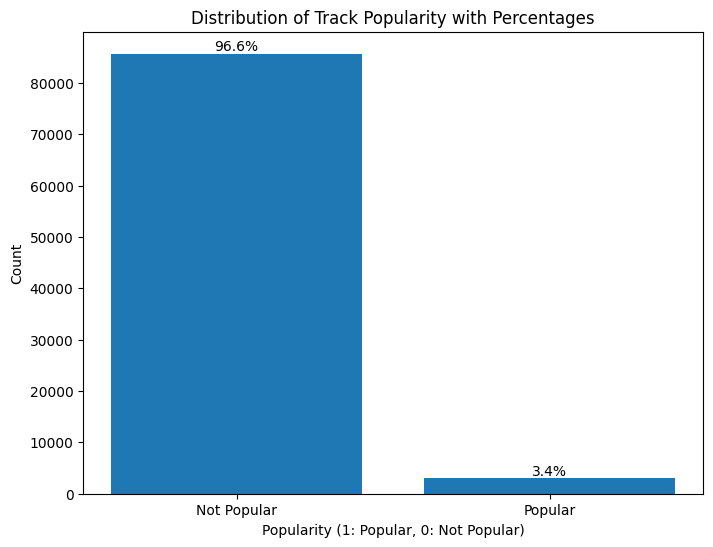

In [ ]:
# prompt: generate a graph to show distribution of is_popular variable along with percentages

import matplotlib.pyplot as plt

# Assuming df_final_no_outliers and 'is_popular' column are defined as in your provided code
# ... (your existing code) ...

# Calculate the distribution of 'is_popular'
popularity_counts = df_final_no_outliers['is_popular'].value_counts()
total_count = len(df_final_no_outliers['is_popular'])

# Calculate percentages
percentages = (popularity_counts / total_count) * 100

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(popularity_counts.index, popularity_counts.values)

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Popularity (1: Popular, 0: Not Popular)')
plt.ylabel('Count')
plt.title('Distribution of Track Popularity with Percentages')
plt.xticks(popularity_counts.index, ['Not Popular', 'Popular'])  # Set custom x-axis labels
plt.show()

In [ ]:
df_final_no_outliers.head()

,id,acousticness,album_name,album_release_date,album_release_date_precision,album_total_tracks,album_type,danceability,disc_number,duration_min,...,time_signature_confidence,track_number,valence,Artists_popularity,Artists_followers,broad_genre,artists,is_collaboration,total_tracks_all_artists,is_popular
0,0000vdREvCVMxbQTkS888c,0.075700,Lolly,2022-09-23,day,1,single,0.910,1,2.678750,...,1.000,1,0.432,45.000000,1.682600e+04,Other/Niche,Rill,0,1,0
1,000CC8EParg64OmTxVnZ0p,0.406000,Glee Love Songs,2021-02-11,day,100,album,0.269,1,5.382217,...,0.659,10,0.341,67.000000,1.517867e+06,Electronic/Dance,Glee Cast,0,170,0
2,000Iz0K615UepwSJ5z2RE5,0.001140,X,2014-05-30,day,11,album,0.686,1,8.589333,...,0.996,5,0.108,52.880000,1.098065e+06,Electronic/Dance,Paul Kalkbrenner;Pig&Dan,1,53,0
3,000RDCYioLteXcutOjeweY,0.058300,Teeje Week,2018-02-12,day,1,single,0.679,1,3.170050,...,1.000,1,0.839,57.495575,2.791233e+06,Hip-Hop/Rap,Jordan Sandhu;Bunty Bains,1,11,0
4,000qpdoc97IMTBvF8gwcpy,0.000964,Zeit,2001-10-08,day,11,album,0.519,1,5.520667,...,1.000,9,0.234,62.000000,1.172268e+06,Electronic/Dance,Paul Kalkbrenner,0,44,0


In [ ]:
# prompt: Create Album Release Year Column using album_release_date

# Assuming df_final_no_outliers is your DataFrame
df_final_no_outliers['album_release_year']=pd.to_datetime(df_final_no_outliers['album_release_date'],format='ISO8601').dt.year

<ipython-input-97-9c94faa03dea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_no_outliers['album_release_year']=pd.to_datetime(df_final_no_outliers['album_release_date'],format='ISO8601').dt.year


In [ ]:
# prompt: save df_final_no_outliers to csv in the same folder as tracks dataset /content/drive/MyDrive/DM2/dataset/

# Save the DataFrame to a CSV file in the specified directory
df_final_no_outliers.to_csv('/content/drive/MyDrive/DM2/dataset/df_final_no_outliers.csv', index=False)

In [ ]:
df_final_no_outliers['album_release_year'].isna().sum()

In [ ]:
X = df_final_no_outliers.drop(['is_popular','album_release_date','id'], axis=1)

In [ ]:
y = df_final_no_outliers['is_popular']


In [ ]:
# # Assuming df_final_no_outliers and X, y are defined as in your provided code
# # ... (your existing code) ...

# # Identify categorical features
# categorical_features = X.select_dtypes(include=['object']).columns

# # Apply Label Encoding to categorical features
# label_encoders = {}
# for col in categorical_features:
#     le = LabelEncoder()
#     X[col] = le.fit_transform(X[col])
#     label_encoders[col] = le # Store the encoder for later use if needed

# # Now X contains label-encoded categorical features
# # You can proceed with feature selection and model building

# # Drop or convert the datetime column before applying SelectKBest
# X_for_selection = X.drop(columns=['album_release_date'], errors='ignore') # Drop the datetime column


# # Example using SelectKBest with f_classif for feature selection (suitable for classification with mixed data types)
# selector = SelectKBest(f_classif, k=10)  # Select top 10 features
# X_new = selector.fit_transform(X_for_selection, y)  # Use the modified X

# # Get the selected feature indices
# selected_indices = selector.get_support(indices=True)

# # Get the names of selected features
# selected_features = X_for_selection.columns[selected_indices] # Use the modified X's columns
# print("Selected features:", selected_features)

In [ ]:
X=X.drop(["track_popularity"],axis=1)

KeyError: "['track_popularity'] not found in axis"

In [ ]:
X.columns

Index(['acousticness', 'album_name', 'album_release_date_precision',
       'album_total_tracks', 'album_type', 'danceability', 'disc_number',
       'duration_min', 'duration_ms', 'energy', 'explicit',
       'features_duration_ms', 'genre', 'instrumentalness', 'key',
       'key_confidence', 'liveness', 'loudness', 'mode', 'mode_confidence',
       'n_bars', 'n_beats', 'name_x', 'speechiness', 'start_of_fade_out',
       'tempo', 'tempo_confidence', 'time_signature',
       'time_signature_confidence', 'track_number', 'valence',
       'Artists_popularity', 'Artists_followers', 'broad_genre', 'artists',
       'is_collaboration', 'total_tracks_all_artists', 'album_release_year'],
      dtype='object')

Selected features: Index(['acousticness', 'album_name', 'album_total_tracks', 'danceability',
       'energy', 'genre', 'liveness', 'loudness', 'name_x', 'speechiness',
       'tempo', 'tempo_confidence', 'valence', 'Artists_popularity',
       'Artists_followers', 'broad_genre', 'artists',
       'total_tracks_all_artists', 'album_release_year'],
      dtype='object')
                     feature  importance
13        Artists_popularity    0.128348
14         Artists_followers    0.090701
17  total_tracks_all_artists    0.072960
18        album_release_year    0.071177
2         album_total_tracks    0.051808
5                      genre    0.048138
16                   artists    0.044939
3               danceability    0.043612
7                   loudness    0.043289
1                 album_name    0.042554
0               acousticness    0.042534
10                     tempo    0.041682
9                speechiness    0.041188
11          tempo_confidence    0.040753
8            

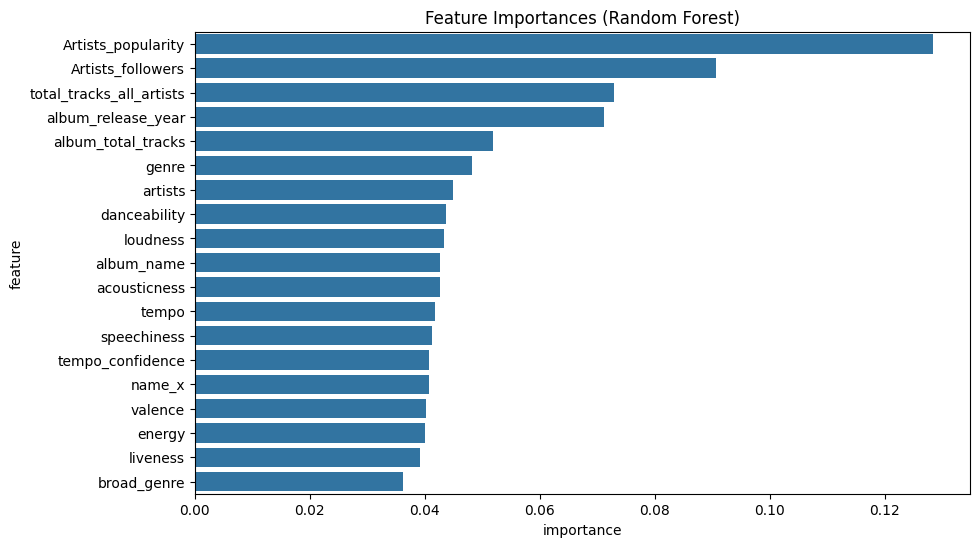

In [ ]:
# prompt: Use Random Forrest to detect relevant variables

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Assuming X and y are defined as in your previous code
# ... (your existing code for data loading, outlier removal, and label encoding) ...

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility

# Use SelectFromModel to select features based on importance from the random forest
selector = SelectFromModel(estimator=rf_clf, threshold="median")  # Use median importance as threshold
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features = X.columns[selected_indices]
print("Selected features:", selected_features)


#Further analysis with selected features

# Train the model with the selected features
rf_clf.fit(X_new, y)

# Get feature importances
importances = rf_clf.feature_importances_

# Create a dataframe to display feature importances
feature_importances = pd.DataFrame({'feature': selected_features, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print feature importances
print(feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances (Random Forest)')
plt.show()

In [ ]:
import pandas as pd

# Example feature importance data
data = {
    'Feature': [
        'Artists_popularity', 'Artists_followers', 'total_tracks_all_artists',
        'album_release_year', 'album_total_tracks'
    ],
    'Importance': [0.128348, 0.090701, 0.072960, 0.071177, 0.051808]
}

df = pd.DataFrame(data)

# Sort features by importance in descending order
df = df.sort_values(by='Importance', ascending=False)

# Calculate cumulative importance
df['Cumulative Importance'] = df['Importance'].cumsum()

# Convert cumulative importance to percentage
df['Cumulative Percentage'] = (df['Cumulative Importance'] / df['Importance'].sum()) * 100

df

,Feature,Importance,Cumulative Importance,Cumulative Percentage
0,Artists_popularity,0.128348,0.128348,30.927676
1,Artists_followers,0.090701,0.219049,52.783655
2,total_tracks_all_artists,0.072960,0.292009,70.364632
3,album_release_year,0.071177,0.363186,87.515964
4,album_total_tracks,0.051808,0.414994,100.000000


In [ ]:
# prompt: Artists_popularity    0.128348
# 14         Artists_followers    0.090701
# 17  total_tracks_all_artists    0.072960
# 18        album_release_year    0.071177
# 2         album_total_tracks    0.051808
# 5                      genre    0.048138
# 3               danceability    0.043612
# 7                   loudness    0.043289
# 0               acousticness    0.042534
# 10                     tempo    0.041682
# 9                speechiness    0.041188
# 12                   valence    0.040214
# 4                     energy    0.040004
# 6                   liveness    0.039166
# Select these features

selected_features = ['Artists_popularity', 'Artists_followers', 'total_tracks_all_artists', 'album_release_year', 'album_total_tracks', 'genre', 'loudness', 'acousticness', 'tempo', 'speechiness']

In [ ]:
# prompt: USE KNN to classify and use selected_features. The classes are unbalanced so give me relvant metrics

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Assuming X, y, and selected_features are defined from your previous code
# ... (your existing code for data loading, outlier removal, feature selection) ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Initialize and train KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Calculate ROC AUC score (if applicable)
try:
    roc_auc = roc_auc_score(y_test, knn_clf.predict_proba(X_test)[:, 1])
    print("ROC AUC Score:", roc_auc)
except AttributeError:
    print("ROC AUC score could not be computed. Ensure that the model supports probability estimates.")


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17164
           1       0.45      0.18      0.26       570

    accuracy                           0.97     17734
   macro avg       0.71      0.59      0.62     17734
weighted avg       0.96      0.97      0.96     17734

[[17034   130]
 [  465   105]]
Accuracy: 0.9664486297507613
F1 Score: 0.2608695652173913
Precision: 0.44680851063829785
Recall: 0.18421052631578946
ROC AUC Score: 0.7882917939219991


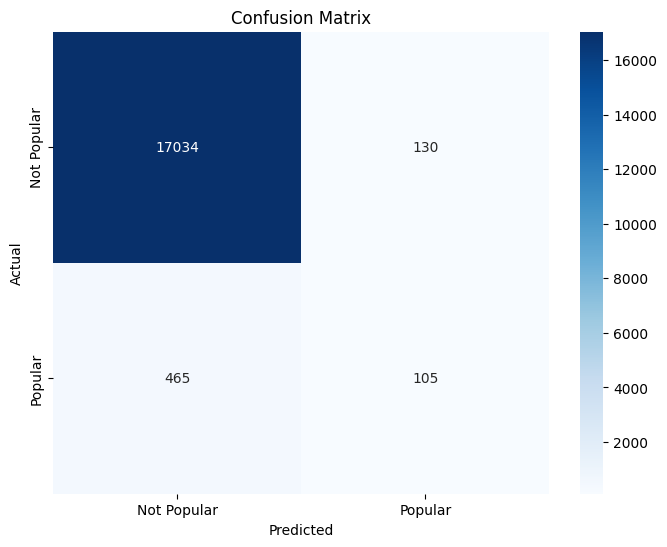

In [ ]:
# prompt: Plot Confusion Matrrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined from your previous code
# ... (your existing code for data loading, model training, and prediction) ...

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Undersampling

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 2420, 1: 2420})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

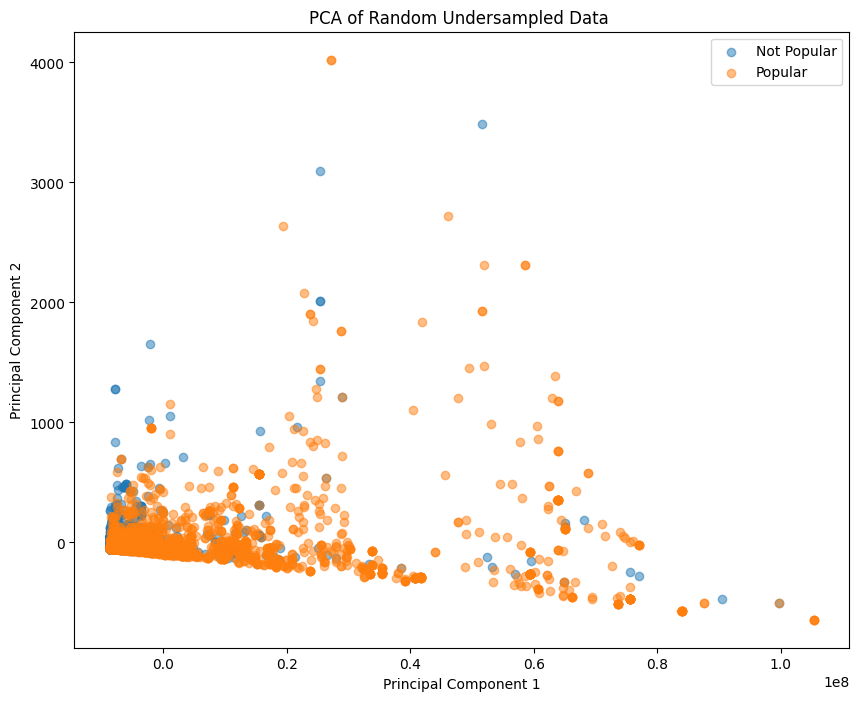

In [ ]:
# prompt: PLOT PCA and rename class labels accordingly

import matplotlib.pyplot as plt

# Assuming X_pca and y_res are defined from the previous code
# ... (your existing code for data loading, outlier removal, and PCA) ...

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Define a mapping for class labels
label_mapping = {0: 'Not Popular', 1: 'Popular'}

# Plot inliers and outliers with renamed class labels
for label in np.unique(y_res):
    plt.scatter(
        X_pca[y_res == label, 0],
        X_pca[y_res == label, 1],
        label=label_mapping[label],  # Use the renamed label here
        alpha=0.5
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Random Undersampled Data ')
plt.legend()
plt.show()

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_clf.fit(X_res, y_res)

# Make predictions on the test set
y_pred = knn_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Calculate ROC AUC score (if applicable)
try:
    roc_auc = roc_auc_score(y_test, knn_clf.predict_proba(X_test)[:, 1])
    print("ROC AUC Score:", roc_auc)
except AttributeError:
    print("ROC AUC score could not be computed. Ensure that the model supports probability estimates.")

              precision    recall  f1-score   support

           0       0.99      0.75      0.86     17164
           1       0.10      0.79      0.17       570

    accuracy                           0.76     17734
   macro avg       0.54      0.77      0.51     17734
weighted avg       0.96      0.76      0.83     17734

[[12946  4218]
 [  118   452]]
Accuracy: 0.7554979136122703
F1 Score: 0.17251908396946564
Precision: 0.09678800856531049
Recall: 0.7929824561403509
ROC AUC Score: 0.8373430517566347


In [ ]:
# fit

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

# predict
y_pred = clf.predict(X_test)
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Calculate ROC AUC score (if applicable)
try:
    roc_auc = roc_auc_score(y_test, knn_clf.predict_proba(X_test)[:, 1])
    print("ROC AUC Score:", roc_auc)
except AttributeError:
    print("ROC AUC score could not be computed. Ensure that the model supports probability estimates.")


              precision    recall  f1-score   support

           0       0.99      0.85      0.91     17164
           1       0.15      0.80      0.25       570

    accuracy                           0.85     17734
   macro avg       0.57      0.82      0.58     17734
weighted avg       0.96      0.85      0.89     17734

[[14561  2603]
 [  116   454]]
Accuracy: 0.8466786962896131
F1 Score: 0.2503446374414116
Precision: 0.14851161269218188
Recall: 0.7964912280701755
ROC AUC Score: 0.8373430517566347


In [ ]:
# prompt: Fine tune the DecisionTree model

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_res, y_res)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the model with the best hyperparameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_res, y_res)

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

try:
    roc_auc = roc_auc_score(y_test, best_clf.predict_proba(X_test)[:, 1])
    print("ROC AUC Score:", roc_auc)
except AttributeError:
    print("ROC AUC score could not be computed.")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: 0.8648760330578513
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     17164
           1       0.15      0.85      0.26       570

    accuracy                           0.84     17734
   macro avg       0.57      0.85      0.58     17734
weighted avg       0.97      0.84      0.89     17734

[[14453  2711]
 [   86   484]]
Accuracy: 0.842280365399797
F1 Score: 0.2571049136786189
Precision: 0.1514866979655712
Recall: 0.8491228070175438
ROC AUC Score: 0.8869250001022131


In [ ]:
# prompt: do a decision model on data before undersampling

from sklearn.model_selection import GridSearchCV
# ... (your existing code) ...

# Assuming X_train, y_train, and X_test are defined
# ... (your existing code for data loading, preprocessing, and splitting) ...

#Decision Tree before undersampling
clf_before = DecisionTreeClassifier(random_state=42)
clf_before.fit(X_train, y_train)
y_pred_before = clf_before.predict(X_test)

print("Decision Tree before Undersampling:")
print(classification_report(y_test, y_pred_before))
print(confusion_matrix(y_test, y_pred_before))
print("Accuracy:", accuracy_score(y_test, y_pred_before))
print("F1 Score:", f1_score(y_test, y_pred_before))
print("Precision:", precision_score(y_test, y_pred_before))
print("Recall:", recall_score(y_test, y_pred_before))
try:
    roc_auc_before = roc_auc_score(y_test, clf_before.predict_proba(X_test)[:, 1])
    print("ROC AUC Score:", roc_auc_before)
except AttributeError:
    print("ROC AUC score could not be computed.")

Decision Tree before Undersampling:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17164
           1       0.35      0.39      0.37       570

    accuracy                           0.96     17734
   macro avg       0.66      0.68      0.67     17734
weighted avg       0.96      0.96      0.96     17734

[[16737   427]
 [  345   225]]
Accuracy: 0.9564678019623323
F1 Score: 0.36824877250409166
Precision: 0.3450920245398773
Recall: 0.39473684210526316
ROC AUC Score: 0.6849295956040183


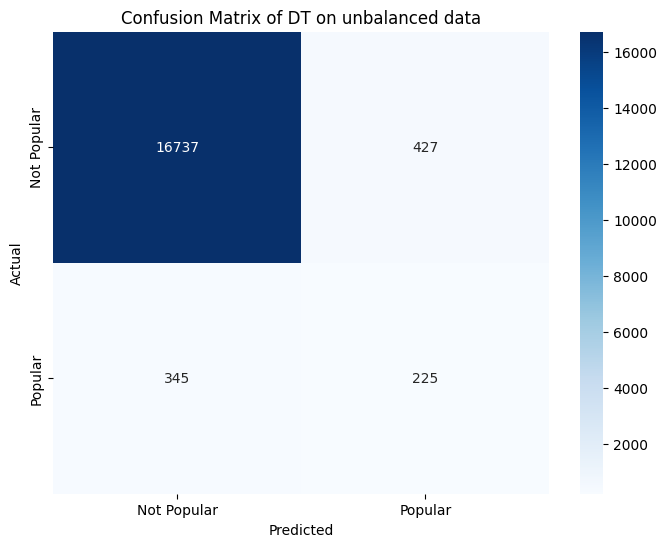

In [ ]:
# prompt: plot the confusion matrix for above results of above model

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined from your previous code
# ... (your existing code for data loading, model training, and prediction) ...

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_before)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of DT on unbalanced data')
plt.show()

## TomekLinks Undersampling

In [ ]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The TomekLinks or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Resampled dataset shape Counter({0: 67704, 1: 2420})


In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

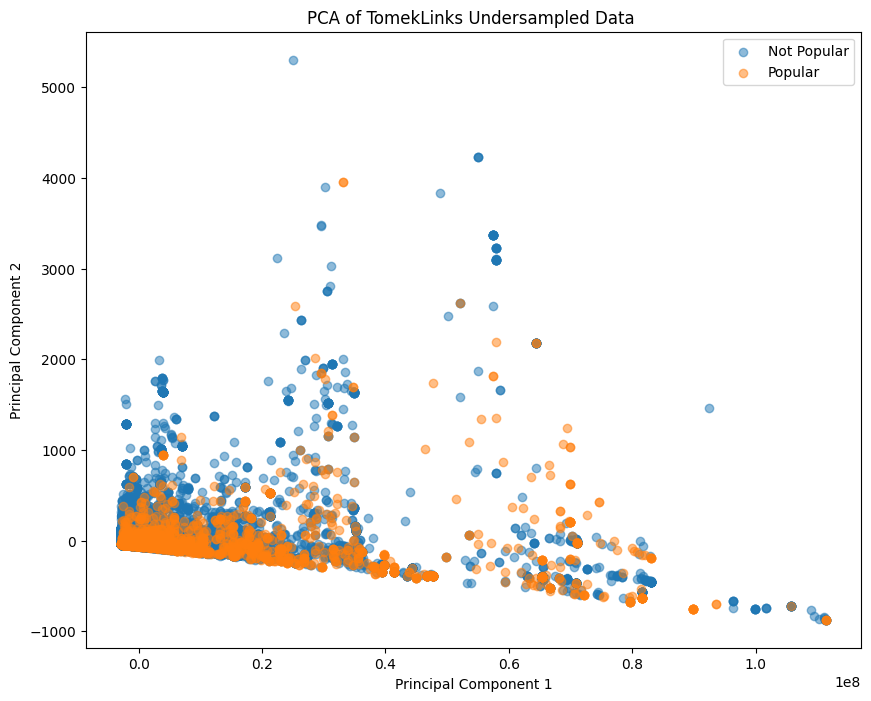

In [ ]:
# prompt: PLOT PCA and rename class labels accordingly

import matplotlib.pyplot as plt

# Assuming X_pca and y_res are defined from the previous code
# ... (your existing code for data loading, outlier removal, and PCA) ...

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Define a mapping for class labels
label_mapping = {0: 'Not Popular', 1: 'Popular'}

# Plot inliers and outliers with renamed class labels
for label in np.unique(y_res):
    plt.scatter(
        X_pca[y_res == label, 0],
        X_pca[y_res == label, 1],
        label=label_mapping[label],  # Use the renamed label here
        alpha=0.5
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of TomekLinks Undersampled Data ')
plt.legend()
plt.show()

In [ ]:
# prompt: Fine tune the DecisionTree model

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_res, y_res)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the model with the best hyperparameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_res, y_res)

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

try:
    roc_auc = roc_auc_score(y_test, best_clf.predict_proba(X_test)[:, 1])
    print("ROC AUC Score:", roc_auc)
except AttributeError:
    print("ROC AUC score could not be computed.")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.9685414258012492
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     17164
           1       0.52      0.32      0.39       570

    accuracy                           0.97     17734
   macro avg       0.75      0.65      0.69     17734
weighted avg       0.96      0.97      0.96     17734

[[16995   169]
 [  390   180]]
Accuracy: 0.9684786286229841
F1 Score: 0.39173014145810664
Precision: 0.5157593123209169
Recall: 0.3157894736842105
ROC AUC Score: 0.8935726346862263


# OverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [ ]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 68515, 1: 68515})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

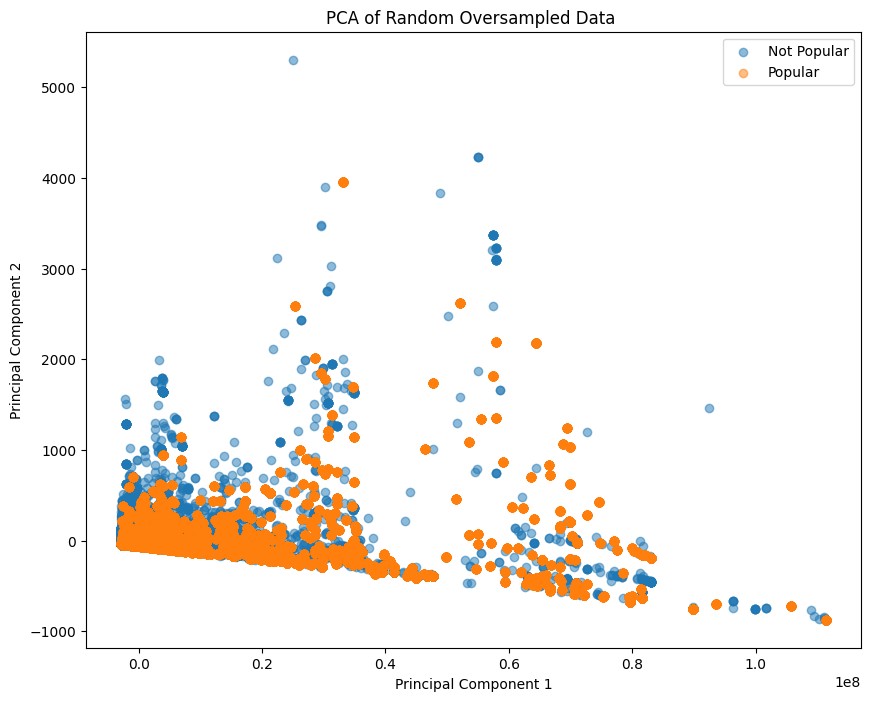

In [ ]:
# prompt: PLOT PCA and rename class labels accordingly

import matplotlib.pyplot as plt

# Assuming X_pca and y_res are defined from the previous code
# ... (your existing code for data loading, outlier removal, and PCA) ...

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Define a mapping for class labels
label_mapping = {0: 'Not Popular', 1: 'Popular'}

# Plot inliers and outliers with renamed class labels
for label in np.unique(y_res):
    plt.scatter(
        X_pca[y_res == label, 0],
        X_pca[y_res == label, 1],
        label=label_mapping[label],  # Use the renamed label here
        alpha=0.5
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Random Oversampled Data ')
plt.legend()
plt.show()

In [ ]:
# prompt: Fine tune the DecisionTree model

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_res, y_res)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the model with the best hyperparameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_res, y_res)

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

try:
    roc_auc = roc_auc_score(y_test, best_clf.predict_proba(X_test)[:, 1])
    print("ROC AUC Score:", roc_auc)
except AttributeError:
    print("ROC AUC score could not be computed.")

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9889878128876889
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17164
           1       0.37      0.34      0.36       570

    accuracy                           0.96     17734
   macro avg       0.67      0.66      0.67     17734
weighted avg       0.96      0.96      0.96     17734

[[16826   338]
 [  374   196]]
Accuracy: 0.959851133416037
F1 Score: 0.35507246376811596
Precision: 0.36704119850187267
Recall: 0.34385964912280703
ROC AUC Score: 0.6620836348620327


## SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 68515, 1: 68515})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

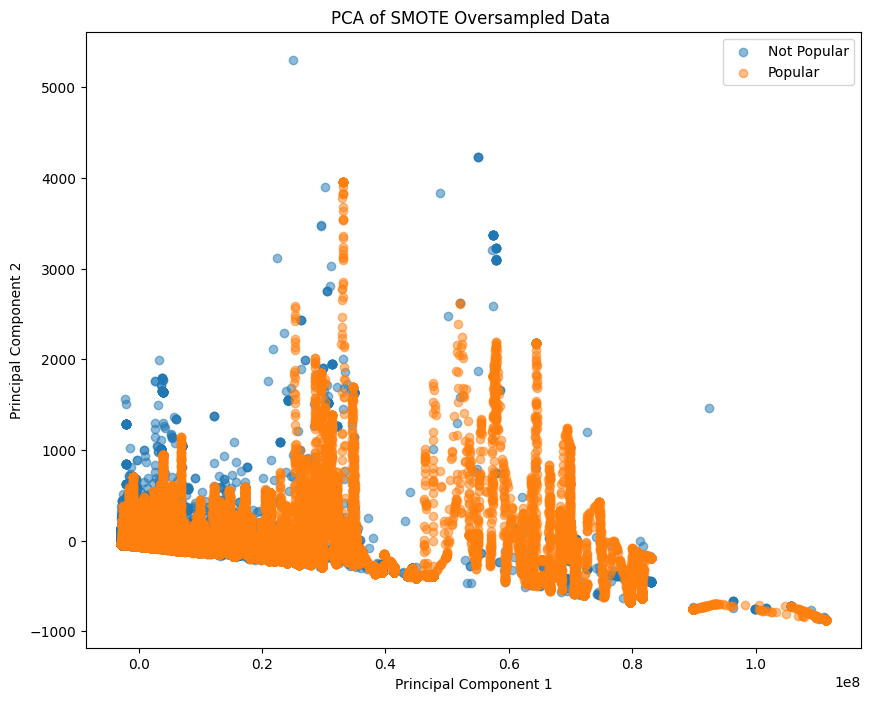

In [ ]:
# prompt: PLOT PCA and rename class labels accordingly

import matplotlib.pyplot as plt

# Assuming X_pca and y_res are defined from the previous code
# ... (your existing code for data loading, outlier removal, and PCA) ...

# Create the scatter plot
plt.figure(figsize=(10, 8))

# Define a mapping for class labels
label_mapping = {0: 'Not Popular', 1: 'Popular'}

# Plot inliers and outliers with renamed class labels
for label in np.unique(y_res):
    plt.scatter(
        X_pca[y_res == label, 0],
        X_pca[y_res == label, 1],
        label=label_mapping[label],  # Use the renamed label here
        alpha=0.5
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of SMOTE Oversampled Data ')
plt.legend()
plt.show()

In [ ]:
# prompt: Fine tune the DecisionTree model

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_res, y_res)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the model with the best hyperparameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_res, y_res)

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

try:
    roc_auc = roc_auc_score(y_test, best_clf.predict_proba(X_test)[:, 1])
    print("ROC AUC Score:", roc_auc)
except AttributeError:
    print("ROC AUC score could not be computed.")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9604466175290082
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     17164
           1       0.28      0.54      0.37       570

    accuracy                           0.94     17734
   macro avg       0.63      0.75      0.67     17734
weighted avg       0.96      0.94      0.95     17734

[[16378   786]
 [  263   307]]
Accuracy: 0.9408480884177287
F1 Score: 0.3692122669873722
Precision: 0.2808783165599268
Recall: 0.5385964912280702
ROC AUC Score: 0.7464014849521847


# Algorithm Level

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3,
                             class_weight={0:1, 1: 5}, random_state=42)
clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)
# Evaluate the best model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

try:
    roc_auc = roc_auc_score(y_test, best_clf.predict_proba(X_test)[:, 1])
    print("ROC AUC Score:", roc_auc)
except AttributeError:
    print("ROC AUC score could not be computed.")

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17164
           1       0.30      0.50      0.38       570

    accuracy                           0.95     17734
   macro avg       0.64      0.73      0.68     17734
weighted avg       0.96      0.95      0.95     17734

[[16514   650]
 [  286   284]]
Accuracy: 0.947220029322206
F1 Score: 0.3776595744680851
Precision: 0.30406852248394006
Recall: 0.4982456140350877
ROC AUC Score: 0.7464014849521847
